<a href="https://colab.research.google.com/github/nkolli1176/first_neural_net/blob/master/deep_NN_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   25G  316G   8% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/sda1       365G   29G  337G   8% /opt/bin
tmpfs           6.4G   12K  6.4G   1% /var/colab
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   15G  497M  97% /content/gdrive


In [0]:
cat ../../../etc/fstab

# UNCONFIGURED FSTAB FOR BASE SYSTEM
tmpfs /dev/shm tmpfs defaults,size=10g 0 0
tmpfs /dev/shm tmpfs defaults,size=16g 0 0


In [0]:
!echo "tmpfs /dev/shm tmpfs defaults,size=16g 0 0" >> ../../../etc/fstab

In [0]:
cat ../../../etc/fstab

# UNCONFIGURED FSTAB FOR BASE SYSTEM
tmpfs /dev/shm tmpfs defaults,size=10g 0 0
tmpfs /dev/shm tmpfs defaults,size=16g 0 0
tmpfs /dev/shm tmpfs defaults,size=16g 0 0


In [0]:
!mount -o remount /dev/shm

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   30G  311G   9% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       365G   32G  334G   9% /opt/bin
shm              10G     0   10G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   14G  1.5G  91% /content/gdrive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import copy


In [0]:
def L_model_forward(X, parameters):

    x0 = X
    caches = {}
#    caches = []
    # Gotta save the inputs as the first activations
    caches['A0'] = x0
#    print('Input size..'+str(x0.shape))

    for i in range(1, int(len(parameters.keys())/2)+1):
#        print('Max value in W'+str(i)+'....'+str(np.max(parameters['W'+str(i)].flatten())))
        zl = np.matmul(parameters['W'+str(i)], x0) + parameters['b'+str(i)]
        if (i == int(len(parameters.keys())/2)):
            # Output layer Activation is sigmoid        
            x0 = sigmoid(zl)
#            print('Fwd prop Layer..'+str(i)+'...Sigmoid..'+str(parameters['W'+str(i)].shape))            
        else:            
#            print('Fwd prop Layer..'+str(i)+'...Relu..'+str(parameters['W'+str(i)].shape))            
            x0 = relu(zl)

        caches['A'+str(i)]=x0
        caches['Z'+str(i)]=zl
        caches['W'+str(i)]=parameters['W'+str(i)]
        caches['b'+str(i)]=parameters['b'+str(i)]        

    x0[x0 <= 0.001] = 0.001
    x0[x0 >= 0.999] = 0.999

    AL = x0     
    
#    print('Caches..', len(caches))
    return AL, caches 


In [0]:
def initialize_parameters_deep(layers_dims):

    num_layers = len(layers_dims)
#    print(num_layers)
    parameters = {}
    
    for i in range(num_layers-1):
        parameters['W'+str(i+1)] = np.random.randn(layers_dims[i+1], layers_dims[i]) * np.sqrt(2/(layers_dims[i+1]+layers_dims[i]))
        parameters['b'+str(i+1)] = np.zeros((layers_dims[i+1], 1))
#        print(parameters['b'+str(i+1)].shape)
        
    return parameters 



In [0]:
def update_parameters(parameters, grads, learning_rate):

    for i in range(1, int(len(parameters.keys())/2)+1):
#        print('Updating Layer..'+str(i))
        parameters['W'+str(i)] = parameters['W'+str(i)] - (learning_rate * grads['dW'+str(i)])
        parameters['b'+str(i)] = parameters['b'+str(i)] - (learning_rate * grads['db'+str(i)])

    return parameters



In [0]:
# Backward propagation (Sigmoid -> Relu -> Relu..)
def L_model_backward(AL, Y, caches):

    grads = {}
    m = len(Y.flatten())
    # Condition the shapes so that output and labels align
    Y = np.reshape(Y, (1,m))
    AL = np.reshape(AL, (1,m))
    numlayers = int(np.floor(len(caches)/4))   

    da_next = np.divide(1-Y, 1-AL) - (np.divide(Y, AL))

    for i in range(numlayers, 0, -1):
        # Last layer has a different activation
        if (i == numlayers):
            gprime_curr = sigmoidDeriv(caches['Z'+str(i)])
        else:
            gprime_curr = reluDerivative(caches['Z'+str(i)])

        dz = np.multiply(da_next, gprime_curr)

        # Activations coming into the first layer are the inputs
        temp_al_prev = np.transpose(caches['A'+str(i-1)])

        dW = np.divide(np.matmul(dz, temp_al_prev), m)
        db = np.divide(np.sum(dz, axis=1, keepdims=True), m)
        
        da_prev = np.matmul(np.transpose(caches['W'+str(i)]), dz)
        
        da_next = da_prev
        grads['dW'+str(i)] = dW
        grads['db'+str(i)] = db

    return grads


In [0]:
# Backward propagation (Sigmoid -> Relu -> Relu..)
def L_model_backward_L2_reg(AL, Y, caches, L2_lambd=200):

    grads = {}
    m = len(Y.flatten())
    # Condition the shapes so that output and labels align
    Y = np.reshape(Y, (1,m))
    AL = np.reshape(AL, (1,m))
    numlayers = int(np.floor(len(caches)/4))   

    da_next = np.divide(1-Y, 1-AL) - (np.divide(Y, AL))

    for i in range(numlayers, 0, -1):
        # Last layer has a different activation
        if (i == numlayers):
            gprime_curr = sigmoidDeriv(caches['Z'+str(i)])
        else:
            gprime_curr = reluDerivative(caches['Z'+str(i)])

        dz = np.multiply(da_next, gprime_curr)

        # Activations coming into the first layer are the inputs
        temp_al_prev = np.transpose(caches['A'+str(i-1)])

        dW = np.divide(np.matmul(dz, temp_al_prev), m)
        # Gradient for W here is L2 regularized
        L2term = (L2_lambd * caches['W'+str(i)])/m
        dW += L2term
        
        db = np.divide(np.sum(dz, axis=1, keepdims=True), m)
        
        da_prev = np.matmul(np.transpose(caches['W'+str(i)]), dz)
        
        da_next = da_prev
        grads['dW'+str(i)] = dW
        grads['db'+str(i)] = db

    return grads


In [0]:

def sigmoid(z):
    sig = 1/(1 + np.exp(-z))
    return sig

def relu(a):
    rel = np.maximum(a, 0)
    return rel

def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def sigmoidDeriv(z):
    sd = sigmoid(z)*(1 - sigmoid(z))
    return sd



In [0]:
# Logistic regression cost for now
def compute_cost(AL, Y):
    
#    cost = np.sum(np.multiply((1-Y),np.log((1-AL))) + np.multiply((Y),np.log((AL))))
    m = len(Y.flatten())
    # Condition the shapes so that output and labels align
    Y = np.reshape(Y, (1,m))
    AL = np.reshape(AL, (1,m))
    
    cost = -1/m * (np.sum(np.multiply(1-Y, np.log(1-AL))) + np.sum(np.multiply(Y, np.log(AL))))
    
    # Also return success rate
    x = (AL >= 0.5)

    success = 1 - (np.count_nonzero(Y - x)/m)
    
    return cost, success


In [0]:
# Logistic regression cost for now
def compute_L2_reg_cost(AL, Y, parameters, L2_lambd = 200):
    
#    cost = np.sum(np.multiply((1-Y),np.log((1-AL))) + np.multiply((Y),np.log((AL))))
    m = Y.size
    # Condition the shapes so that output and labels align
    Y = np.reshape(Y, (1,m))
    AL = np.reshape(AL, (1,m))

    # Cross entropy cost    
    cost = -1/m * (np.sum(np.multiply(1-Y, np.log(1-AL))) + np.sum(np.multiply(Y, np.log(AL))))
    
    # Compute the L2 reg cost component
    L2cost = 0
    for i in range(1, int(len(parameters.keys())/2)+1):
      L2cost += np.sum(np.square(parameters['W'+str(i)]))

    L2cost = (L2_lambd * L2cost)/(2*m)
    
    # Also return success rate
    x = (AL >= 0.5)

    success = 1 - (np.count_nonzero(Y - x)/m)
    
    return (cost + L2cost), success


In [0]:
## Global variables are defined in the class definition
class Deep_NN_frmwrk:
    
    def __init__(self, name):
        self.name = name
        # self.localfolder = '/Users/administrator/Documents/Python/dim_128_mono';
        self.localfolder = 'gdrive/My Drive/';
        self.train_data_file = 'X_train.dat'
        self.train_labels_file = 'Y_train.dat'
        self.test_data_file = 'X_test.dat'
        self.test_labels_file = 'Y_test.dat'

        
        # Define input feature length - number of pixels in the images here
        self.img_h = 32
        self.img_w = 32
        self.img_d = 1
    
        dim_1 = self.img_h * self.img_w * self.img_d
        self.layers_dims = [dim_1, 50, 11, 5, 1] #  5-layer model
        self.nn_parameters = {}
    
        ### Train data
        self.numtrainfiles = 1
        self.kfolds = 10
        self.numbatches = 2 
        self.learning_rate = 0.005
        self.learning_rate_start = 0.005
        self.epochs = 10000 # per data set
        self.print_cost = 1
        self.use_saved_params = 0
        self.L2_lambd = 0.8
        
        # To hold runtime stuff
        self.costs = []                         # keep track of cost
        self.train_successes = []
        self.xval_successes = []

        # Adam optimizer
        self.beta_mom = 0.9
        self.beta_rms = 0.99
        self.mom_prev = {}
        self.rms_prev = {}
        self.epsilon = 1e-8
        
        # keep track of status
        self.starttime = time.time()
        self.curr_epoch = 0
        self.n_iter = 0

##### Function
    # Adam optimized update of weights        
    def update_params_Adam(self, grads, batch_size):

        # print('Size of mom_prev is ..' + str(len(self.mom_prev)))
        # batch_size = 1
        if (len(self.mom_prev)==0):
            for i in range(1, int(len(self.nn_parameters.keys())/2)+1):
                self.mom_prev['VdW'+str(i)] = np.zeros((self.nn_parameters['W'+str(i)].shape))
                self.mom_prev['Vdb'+str(i)] = np.zeros((self.nn_parameters['b'+str(i)].shape))
                self.rms_prev['SdW'+str(i)] = np.zeros((self.nn_parameters['W'+str(i)].shape))
                self.rms_prev['Sdb'+str(i)] = np.zeros((self.nn_parameters['b'+str(i)].shape))

        for i in range(1, int(len(self.nn_parameters.keys())/2)+1):
            
            self.mom_prev['VdW'+str(i)] = (self.beta_mom * self.mom_prev['VdW'+str(i)]) + ((1 - self.beta_mom) * grads['dW'+str(i)]/batch_size)
            tmp_VdW = np.divide(self.mom_prev['VdW'+str(i)], (1 - np.power(self.beta_mom, self.n_iter)))
            self.mom_prev['Vdb'+str(i)] = (self.beta_mom * self.mom_prev['Vdb'+str(i)]) + ((1 - self.beta_mom) * grads['db'+str(i)]/batch_size)
            tmp_Vdb = np.divide(self.mom_prev['Vdb'+str(i)], (1 - np.power(self.beta_mom, self.n_iter)))

            self.rms_prev['SdW'+str(i)] = (self.beta_rms * self.rms_prev['SdW'+str(i)]) + ((1 - self.beta_rms) * np.square(grads['dW'+str(i)]/batch_size))
            tmp_SdW = np.divide(self.rms_prev['SdW'+str(i)], (1 - np.power(self.beta_rms, self.n_iter)))
            self.rms_prev['Sdb'+str(i)] = (self.beta_rms * self.rms_prev['Sdb'+str(i)]) + ((1 - self.beta_rms) * np.square(grads['db'+str(i)]/batch_size))
            tmp_Sdb = np.divide(self.rms_prev['Sdb'+str(i)], (1 - np.power(self.beta_rms, self.n_iter)))                
    
            self.nn_parameters['W'+str(i)] = self.nn_parameters['W'+str(i)] - (self.learning_rate * np.divide(tmp_VdW, (np.sqrt(tmp_SdW) + self.epsilon)))
            self.nn_parameters['b'+str(i)] = self.nn_parameters['b'+str(i)] - (self.learning_rate * np.divide(tmp_Vdb, (np.sqrt(tmp_Sdb) + self.epsilon)))

##### Function
    # Adam with Weight decay, use without L2 regularization        
    def update_params_Adam_Wdecay(self, grads):

        if (len(self.mom_prev)==0):
            for i in range(1, int(len(self.nn_parameters.keys())/2)+1):
                self.mom_prev['VdW'+str(i)] = np.zeros((self.nn_parameters['W'+str(i)].shape))
                self.mom_prev['Vdb'+str(i)] = np.zeros((self.nn_parameters['b'+str(i)].shape))
                self.rms_prev['SdW'+str(i)] = np.zeros((self.nn_parameters['W'+str(i)].shape))
                self.rms_prev['Sdb'+str(i)] = np.zeros((self.nn_parameters['b'+str(i)].shape))

        for i in range(1, int(len(self.nn_parameters.keys())/2)+1):
            
            self.mom_prev['VdW'+str(i)] = (self.beta_mom * self.mom_prev['VdW'+str(i)]) + ((1 - self.beta_mom) * grads['dW'+str(i)])
            tmp_VdW = np.divide(self.mom_prev['VdW'+str(i)], (1 - np.power(self.beta_mom, self.n_iter)))
            self.mom_prev['Vdb'+str(i)] = (self.beta_mom * self.mom_prev['Vdb'+str(i)]) + ((1 - self.beta_mom) * grads['db'+str(i)])
            tmp_Vdb = np.divide(self.mom_prev['Vdb'+str(i)], (1 - np.power(self.beta_mom, self.n_iter)))

            self.rms_prev['SdW'+str(i)] = (self.beta_rms * self.rms_prev['SdW'+str(i)]) + ((1 - self.beta_rms) * np.square(grads['dW'+str(i)]))
            tmp_SdW = np.divide(self.rms_prev['SdW'+str(i)], (1 - np.power(self.beta_rms, self.n_iter)))
            self.rms_prev['Sdb'+str(i)] = (self.beta_rms * self.rms_prev['Sdb'+str(i)]) + ((1 - self.beta_rms) * np.square(grads['db'+str(i)]))
            tmp_Sdb = np.divide(self.rms_prev['Sdb'+str(i)], (1 - np.power(self.beta_rms, self.n_iter)))                

            W_Wdecay = self.learning_rate * self.nn_parameters['W'+str(i)] * self.L2_lambd

            self.nn_parameters['W'+str(i)] = self.nn_parameters['W'+str(i)] - (self.learning_rate * np.divide(tmp_VdW, (np.sqrt(tmp_SdW) + self.epsilon))) - W_Wdecay
            self.nn_parameters['b'+str(i)] = self.nn_parameters['b'+str(i)] - (self.learning_rate * np.divide(tmp_Vdb, (np.sqrt(tmp_Sdb) + self.epsilon)))
            
##### Function
    # Load trained weights from disk    
    def loadSavedParams(self):
    
        num_layers = len(self.layers_dims)
        
        ### Load parameters from training +'.dat'
        for i in range(num_layers-1):
            self.nn_parameters['W'+str(i+1)] = np.loadtxt(self.localfolder+'Out_W'+str(i+1)+'.dat')
            if (len(self.nn_parameters['W'+str(i+1)].shape) < 2):
                self.nn_parameters['W'+str(i+1)] = np.reshape(self.nn_parameters['W'+str(i+1)], (1, len(self.nn_parameters['W'+str(i+1)])))
                
            self.nn_parameters['b'+str(i+1)] = np.loadtxt(self.localfolder+'Out_b'+str(i+1)+'.dat')
            if (len(self.nn_parameters['b'+str(i+1)].shape) < 1):
                self.nn_parameters['b'+str(i+1)] = np.reshape(self.nn_parameters['b'+str(i+1)], (1, 1))
            else:
                self.nn_parameters['b'+str(i+1)] = np.reshape(self.nn_parameters['b'+str(i+1)], (len(self.nn_parameters['b'+str(i+1)]), 1))            
        
##### Function
    # Save trained weights    
    def saveParams(self):
        # Save parameters from training
        for i in range(1,int(len(self.nn_parameters.keys())/2)+1):
            np.savetxt(self.localfolder+'Out_W'+str(i)+'.dat', self.nn_parameters['W'+str(i)])
            np.savetxt(self.localfolder+'Out_b'+str(i)+'.dat', self.nn_parameters['b'+str(i)])
                
##### Function
    # test function to view image data            
    def showImageData(X, Y, t_size):
        
    #    # To view the images, make sure labeling is correct
        imgi = int(input('Enter an index..'))
        while (imgi != 99):
            print('Index chosen is...', imgi)
            print('Label is...', Y[imgi])
            reimg = Image.fromarray(np.reshape(X[:,imgi],(t_size)))
    #        t_size = (320,320)
    #        reimg = reimg.resize(t_size, Image.ANTIALIAS)
            plt.imshow(reimg)
            imgi = int(input('Enter an index..'))

##### Function
    # Update learning rate based on epoch number        
    def decayLearningRate(self):
      
      self.learning_rate = self.learning_rate_start/(np.power(10, self.curr_epoch/self.epochs))

##### Function
    # K-fold xval, separate into train and x_val
    # If no kfold just use 10% as xval    
    def splitKfold(self, X, Y, j, m):
    
        if (self.kfolds == 1):
            xval = int(m/10)
            x_train = X[:,0:m-xval]
            y_train = Y[0:m-xval]    
            x_xval = X[:,m-xval+1:]
            y_xval = Y[m-xval+1:]
        else:
            xval = int(m/self.kfolds)
            tmp_range = range(j*xval, (j+1)*xval)
            x_xval = X[:, tmp_range]
            y_xval = Y[tmp_range]
            # splits X and Y
            if (j==0):
                tmp_range = range((j+1)*xval+1, m)
                x_train = X[:, tmp_range]
                y_train = Y[tmp_range]
            else:
                tmp_range1 = range(0, j*xval)
                tmp_range2 = range((j+1)*xval+1, m)
                x_train = np.concatenate((X[:, tmp_range1], X[:, tmp_range2]), axis=1)
                y_train = np.concatenate((Y[tmp_range1], Y[tmp_range2]), axis=0)
                
    #    print(x_xval.shape, y_xval.shape, x_train.shape, y_train.shape)

        return x_xval, y_xval, x_train, y_train

##### Function
    # Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    # With Kfold cross validation
    def L_layer_model_Kfold(self, X, Y):#lr was 0.009
            
        m = X.shape[1]
        
        # Loop (gradient descent)
        for i in range(0, self.kfolds): 
    
            X_xval, Y_xval, X_train, Y_train = self.splitKfold(X, Y, i, m)

            # Batch training, numbatches is 1 if no batch separation
            batch_size = int(X_train.shape[1]/self.numbatches)

            for k in range(0, self.numbatches):
    
                self.n_iter += 1
                
                X_batch = X_train[:,(k*batch_size):((k+1)*batch_size-1)]
                Y_batch = Y_train[(k*batch_size):((k+1)*batch_size-1)]

                # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.            
                AL, caches = L_model_forward(X_batch, self.nn_parameters)

                # Compute cost
                # cost, train_success = compute_cost(AL, Y_batch)
                # Compute cost with L2 reg
                cost, train_success = compute_L2_reg_cost(AL, Y_batch, self.nn_parameters, self.L2_lambd)

                # Backward propagation
                # grads = L_model_backward(AL, Y_batch, caches)
                # Backward propagation with L2 reg
                grads = L_model_backward_L2_reg(AL, Y_batch, caches, self.L2_lambd)

                # Update parameters.
                # self.nn_parameters = update_parameters(self.nn_parameters, grads, self.learning_rate)
                # self.update_params_Adam(grads, 1)
                self.update_params_Adam_Wdecay(grads)                
                    
            # Print the cost every nth training cycle in epoch
            if self.print_cost and i % 4 == 0:
                endtime = time.time()
                print ("Cost after run %i, iteration %i: %f, Time: %f" %(self.curr_epoch, i, cost, (endtime-self.starttime)))
                self.costs.append(cost)
                self.train_successes.append(train_success)
                self.costs = self.costs[-1000:]
                self.train_successes = self.train_successes[-1000:]

                # Run xval set and compute cost.
                AL_xval, xval = L_model_forward(X_xval, self.nn_parameters)        
#                xval_cost, xval_success = compute_cost(AL_xval, Y_xval)
                xval_cost, xval_success = compute_L2_reg_cost(AL_xval, Y_xval, self.nn_parameters, self.L2_lambd)
                self.xval_successes.append(xval_success)
                
                # plot the costs
                plt.plot(np.squeeze(self.train_successes), 'b')
                plt.plot(np.squeeze(self.xval_successes), 'k')            
                plt.ylabel('Success %')
                plt.xlabel('iterations (per tens)')
                plt.title("Learning rate =" + str(self.learning_rate))
                plt.draw()
                plt.pause(1)
                                    
        return train_success
      
##### Function
    # Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.    
    def L_layer_model(self, X, Y):#lr was 0.009
    #    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
        
        # Batch training, numbatches is 1 if no batch separation
        batch_size = int(X.shape[1]/self.numbatches)

        for k in range(0, self.numbatches):

            self.n_iter += 1

            X_batch = X[:,(k*batch_size):((k+1)*batch_size-1)]
            Y_batch = Y[(k*batch_size):((k+1)*batch_size-1)]

            # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.            
            AL, caches = L_model_forward(X_batch, self.nn_parameters)

            # Compute cost
            # cost, train_success = compute_cost(AL, Y_batch)
            # Compute cost with L2 reg
            cost, train_success = compute_L2_reg_cost(AL, Y_batch, self.nn_parameters, self.L2_lambd)

            # Backward propagation
            # grads = L_model_backward(AL, Y_batch, caches)
            # Backward propagation with L2 reg
            grads = L_model_backward_L2_reg(AL, Y_batch, caches, self.L2_lambd)

            # Update parameters.
            # self.nn_parameters = update_parameters(self.nn_parameters, grads, self.learning_rate)
            # self.update_params_Adam(grads, 1)
            self.update_params_Adam_Wdecay(grads)


            # Print the cost every nth training cycle in epoch
            if self.print_cost and k % 4 == 0:
                endtime = time.time()
                print ("Cost after run %i, iteration %i: %f, Time: %f" %(self.curr_epoch, k, cost, (endtime-self.starttime)))
                self.costs.append(cost)
                self.train_successes.append(train_success)

                # plot the costs
                plt.plot(np.squeeze(self.train_successes), 'b')
                plt.ylabel('Success %')
                plt.xlabel('iterations (per tens)')
                plt.title("Learning rate =" + str(self.learning_rate))
                plt.draw()
                plt.pause(1)
    
                
        return train_success

##### Function
    # Train data based on class variables      
    def train_data(self):
        
        print('Layer dims...'+str(self.layers_dims) + '...' + str(time.ctime()))

         # Parameters initialization        
        if (self.use_saved_params):
            self.loadSavedParams()
        else:
            self.nn_parameters = initialize_parameters_deep(self.layers_dims)
                    
        for k in range(self.epochs):
          
          self.curr_epoch = k+1
          
          for i in range(self.numtrainfiles):

              if (self.numtrainfiles) > 1:
                  X_filename = str.split(self.train_data_file,'.')[0] + '_' + str(i+1) + '.' + str.split(self.train_data_file,'.')[1]
                  Y_filename = str.split(self.train_labels_file,'.')[0] + '_' + str(i+1) + '.' + str.split(self.train_labels_file,'.')[1]
                  # Load dataset 
                  X_train = np.loadtxt(self.localfolder + X_filename)
                  Y_train = np.loadtxt(self.localfolder + Y_filename)

                  # Number of examples
                  m = X_train.shape[1]
                  print('Data loaded..' + str(time.ctime()) + '...' + str(X_train.shape))

                  # Shuffle the data
                  marr = np.arange(m)
                  np.random.shuffle(marr)
                  X_train = X_train[:,marr]
                  Y_train = Y_train[marr]

                  X_train = X_train/255       
                  
              else:
                  X_filename = self.train_data_file
                  Y_filename = self.train_labels_file 
                  
                  if (k == 0):
                    # Load dataset 
                    X_train = np.loadtxt(self.localfolder + X_filename)
                    Y_train = np.loadtxt(self.localfolder + Y_filename)
                    # Number of examples
                    m = X_train.shape[1]
                    print('Data loaded..' + str(time.ctime()) + '...' + str(X_train.shape))

                    # Shuffle the data
                    marr = np.arange(m)
                    np.random.shuffle(marr)
                    X_train = X_train[:,marr]
                    Y_train = Y_train[marr]

                    X_train = X_train/255       


              
              train_success = self.L_layer_model_Kfold(X_train, Y_train)
              #train_success = self.L_layer_model(X_train, Y_train)              
          
          # Decay learning rate every epoch
          self.decayLearningRate()

          # Save params every 10 epochs
          if (k + 1) % 10 == 0:
            self.saveParams()
          
          # Save success and cost every epoch
          np.savetxt(self.localfolder + 'train_success.dat', self.train_successes)
          np.savetxt(self.localfolder + 'train_costs.dat', self.costs)



        print('Optimization done..'+str(train_success))        
        self.saveParams()
    
##### Function
    # Test data based on saved parameters and class variables            
    def test_data(self, t_size):
        
        # Load test data
        X_test = np.loadtxt(self.localfolder + self.test_data_file)
        Y_test = np.loadtxt(self.localfolder + self.test_labels_file)
        
        # Number of examples
        m = X_test.shape[1]
        
        # Shuffle the data
        marr = np.arange(m)
        np.random.shuffle(marr)
        X_test = X_test[:,marr]
        Y_test = Y_test[marr]
        
        X_test = X_test/255
        
        self.loadSavedParams()
        
        ### Run forward prop to get the output activations    
        AL, caches = L_model_forward(X_test, self.nn_parameters)
        
        ### Convert AL to binary calls
        calls = (AL >= 0.5)
        
        ## Calculate success percentage
        success = 1 - np.count_nonzero(Y_test - calls)/m
    
        # Show images from test data and the classification results    
#        self.showImageData(X_test, calls, (t_size))    
        
        return success


10
gdrive/My Drive/
Sun May 19 00:06:29 2019
Layer dims...[1024, 50, 11, 5, 1]...Sun May 19 00:06:29 2019
Data loaded..Sun May 19 00:06:49 2019...(1024, 19857)
Cost after run 1, iteration 0: 0.697875, Time: 21.058628


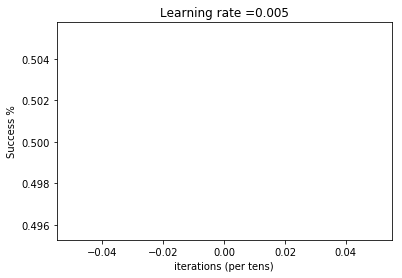

Cost after run 1, iteration 4: 0.694344, Time: 24.111407


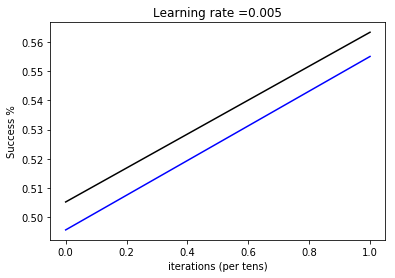

Cost after run 1, iteration 8: 0.693406, Time: 27.045099


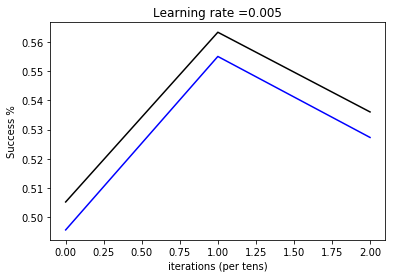

Cost after run 2, iteration 0: 0.693050, Time: 29.163201


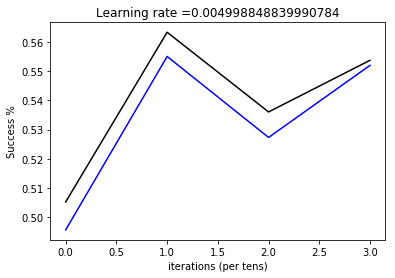

Cost after run 2, iteration 4: 0.692295, Time: 32.268679


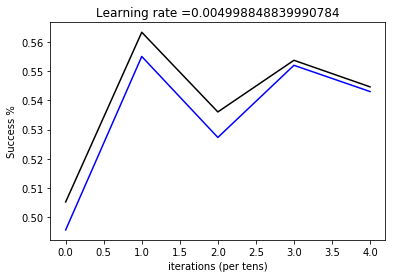

Cost after run 2, iteration 8: 0.691377, Time: 35.267284


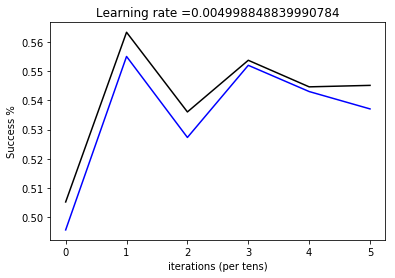

Cost after run 3, iteration 0: 0.690669, Time: 37.343016


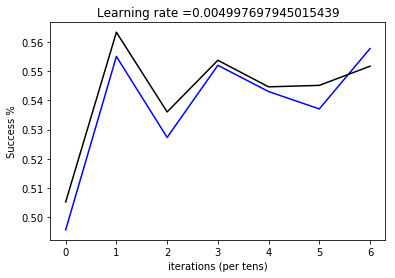

Cost after run 3, iteration 4: 0.689434, Time: 40.338137


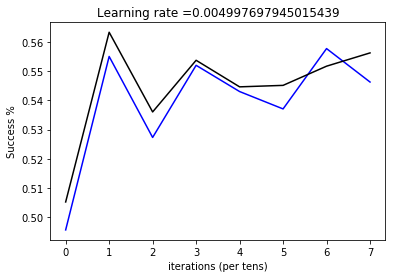

Cost after run 3, iteration 8: 0.687765, Time: 43.328300


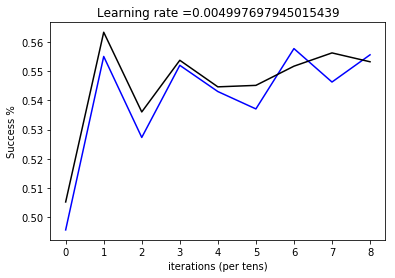

Cost after run 4, iteration 0: 0.686971, Time: 45.416423


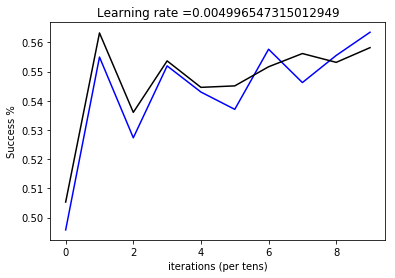

Cost after run 4, iteration 4: 0.685445, Time: 48.366113


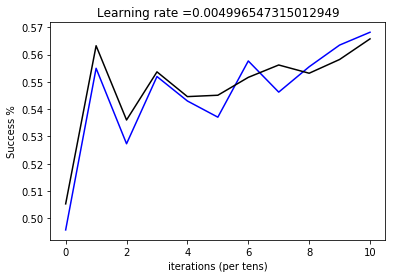

Cost after run 4, iteration 8: 0.683814, Time: 51.372181


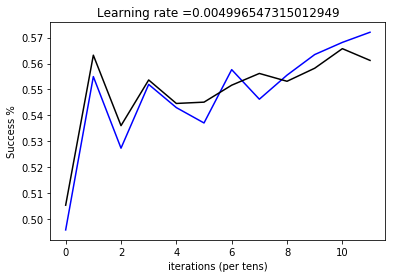

Cost after run 5, iteration 0: 0.683537, Time: 53.445118


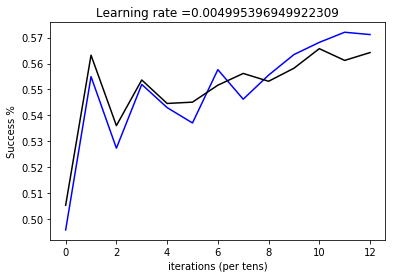

Cost after run 5, iteration 4: 0.682743, Time: 56.407861


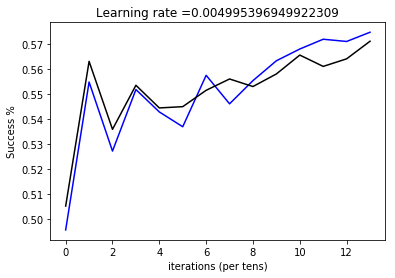

Cost after run 5, iteration 8: 0.681922, Time: 59.381919


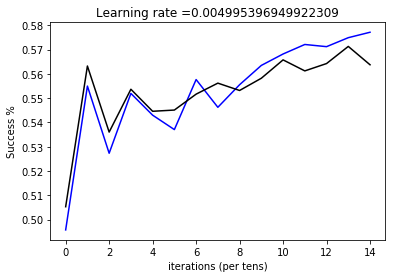

Cost after run 6, iteration 0: 0.681674, Time: 61.487371


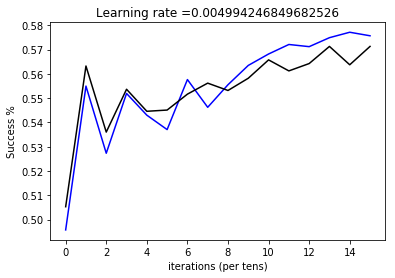

Cost after run 6, iteration 4: 0.681389, Time: 64.478226


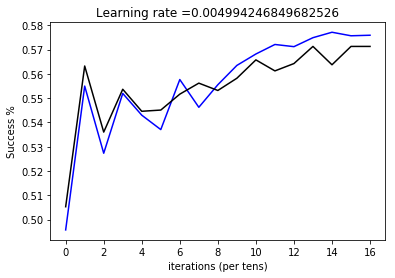

Cost after run 6, iteration 8: 0.680559, Time: 67.566665


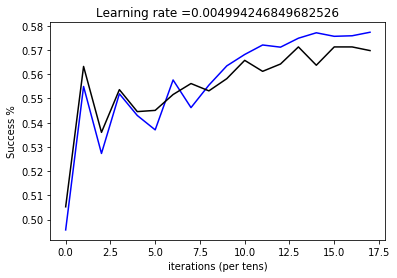

Cost after run 7, iteration 0: 0.680104, Time: 69.675873


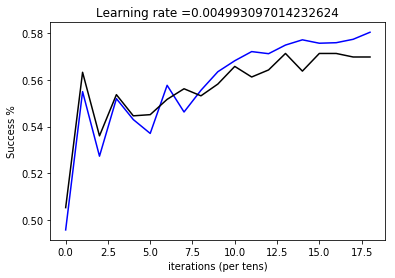

Cost after run 7, iteration 4: 0.679926, Time: 72.656479


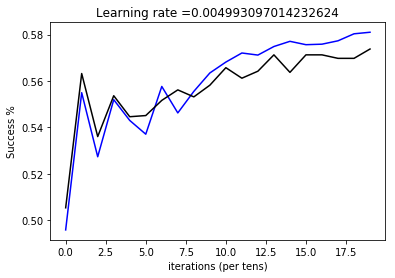

Cost after run 7, iteration 8: 0.679103, Time: 75.623783


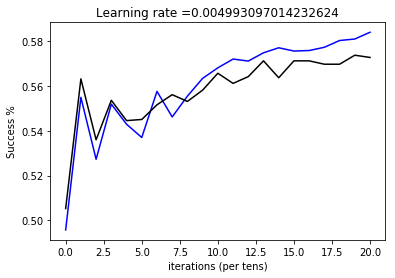

Cost after run 8, iteration 0: 0.679012, Time: 77.714658


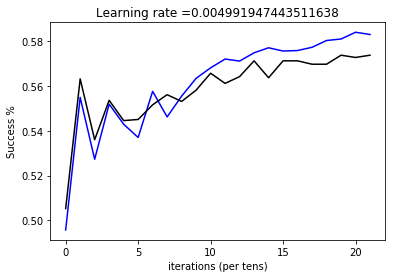

Cost after run 8, iteration 4: 0.678849, Time: 80.666124


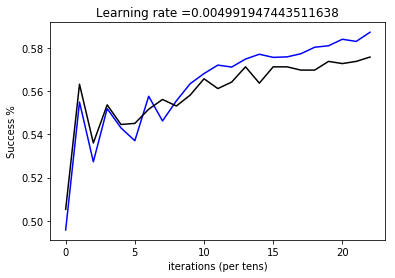

Cost after run 8, iteration 8: 0.678204, Time: 83.640777


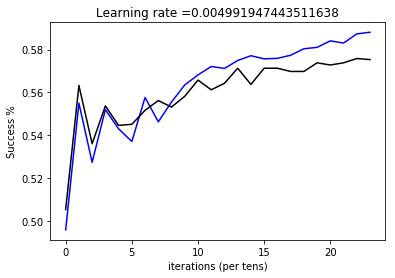

Cost after run 9, iteration 0: 0.677944, Time: 85.687211


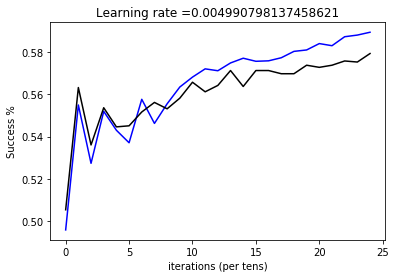

Cost after run 9, iteration 4: 0.677647, Time: 88.618370


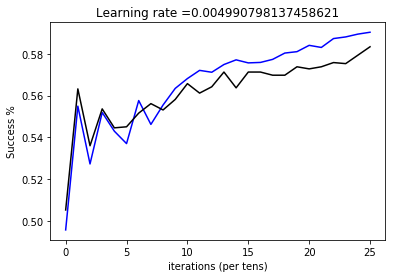

Cost after run 9, iteration 8: 0.676591, Time: 91.600935


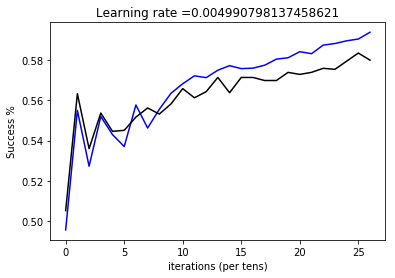

Cost after run 10, iteration 0: 0.676591, Time: 93.770253


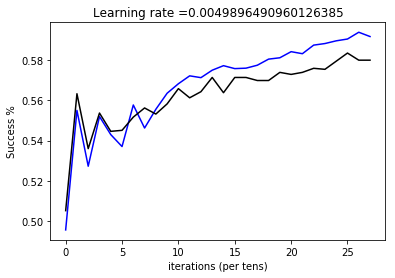

Cost after run 10, iteration 4: 0.675795, Time: 96.881013


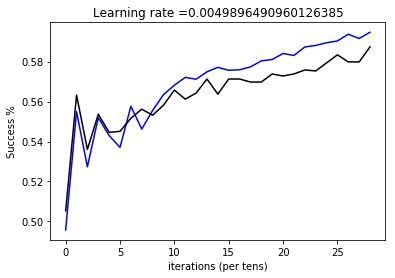

Cost after run 10, iteration 8: 0.674810, Time: 100.011964


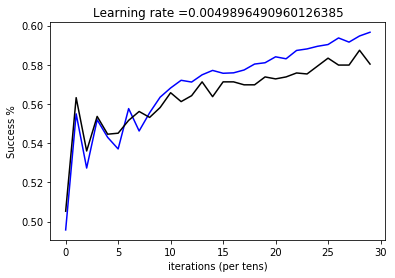

Cost after run 11, iteration 0: 0.674296, Time: 102.276773


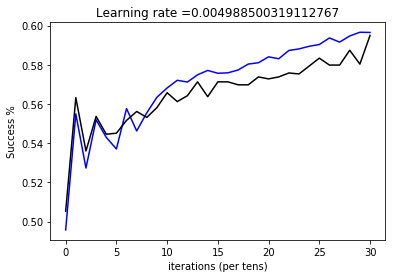

Cost after run 11, iteration 4: 0.673184, Time: 105.342436


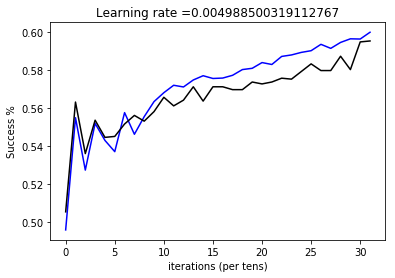

Cost after run 11, iteration 8: 0.671517, Time: 108.323197


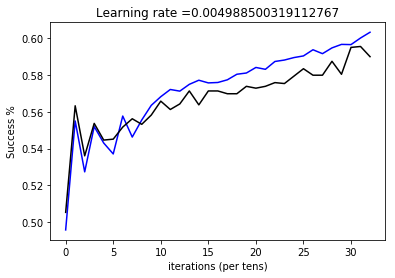

Cost after run 12, iteration 0: 0.670842, Time: 110.424768


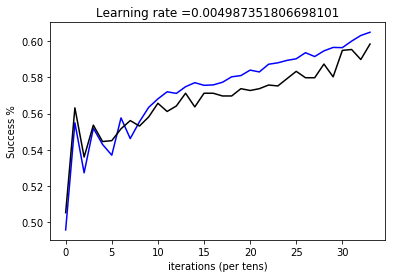

Cost after run 12, iteration 4: 0.669695, Time: 113.363873


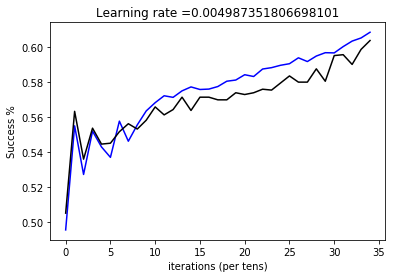

Cost after run 12, iteration 8: 0.667980, Time: 116.386652


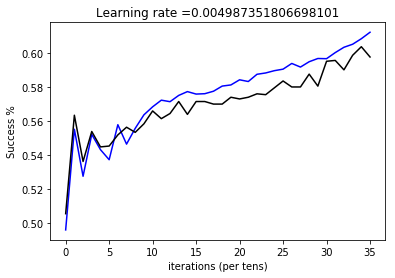

Cost after run 13, iteration 0: 0.667289, Time: 118.483092


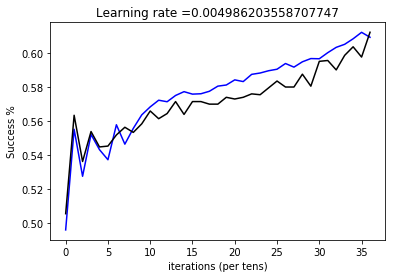

Cost after run 13, iteration 4: 0.666376, Time: 121.441281


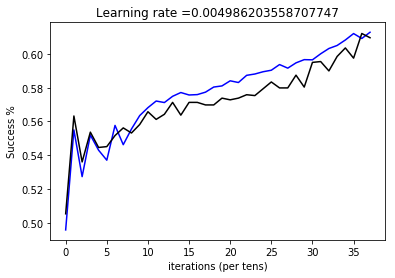

Cost after run 13, iteration 8: 0.665137, Time: 124.410713


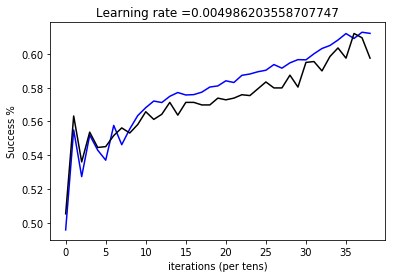

Cost after run 14, iteration 0: 0.664481, Time: 126.575465


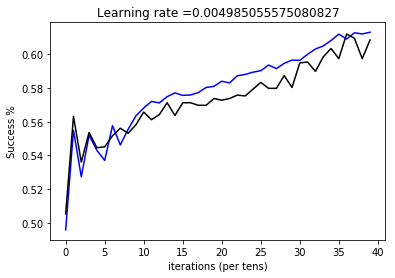

Cost after run 14, iteration 4: 0.663663, Time: 129.720712


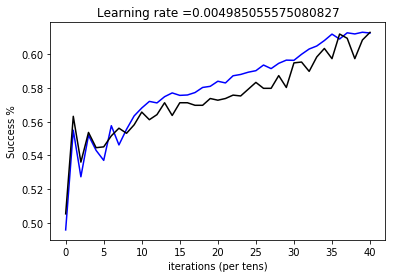

Cost after run 14, iteration 8: 0.663005, Time: 132.748845


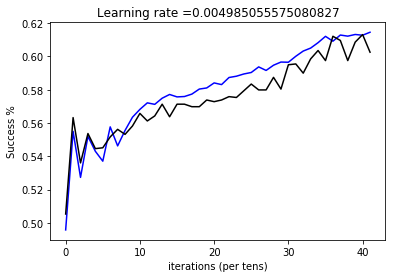

Cost after run 15, iteration 0: 0.662318, Time: 134.829676


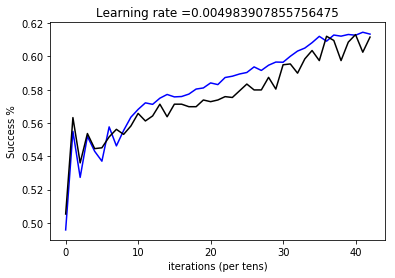

Cost after run 15, iteration 4: 0.661618, Time: 137.792002


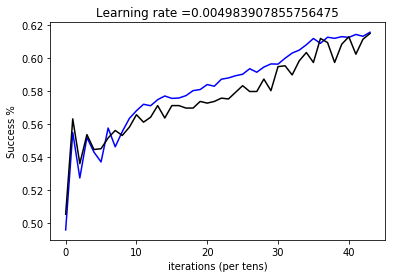

Cost after run 15, iteration 8: 0.661339, Time: 140.866848


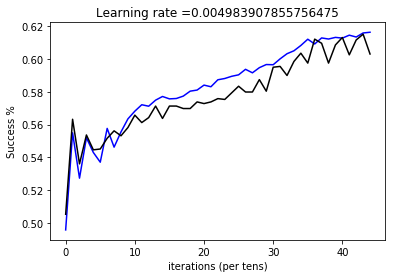

Cost after run 16, iteration 0: 0.660599, Time: 142.953221


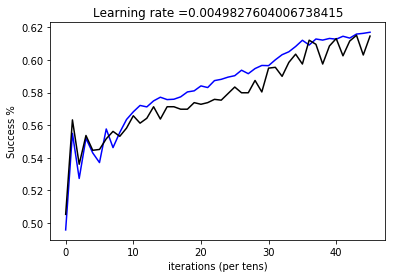

Cost after run 16, iteration 4: 0.660120, Time: 146.017084


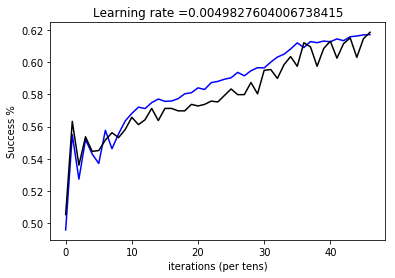

Cost after run 16, iteration 8: 0.659508, Time: 149.235893


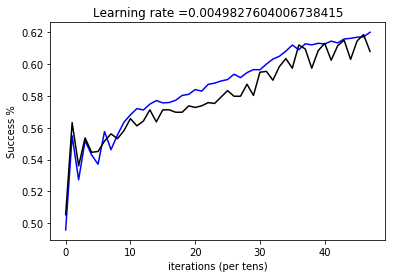

Cost after run 17, iteration 0: 0.659217, Time: 151.425858


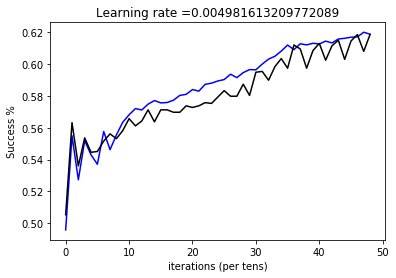

Cost after run 17, iteration 4: 0.659138, Time: 154.584542


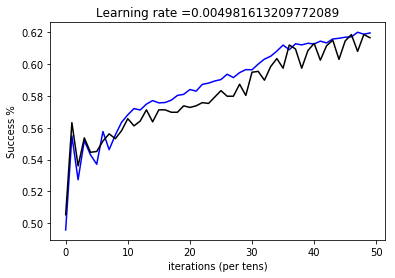

Cost after run 17, iteration 8: 0.658403, Time: 157.589520


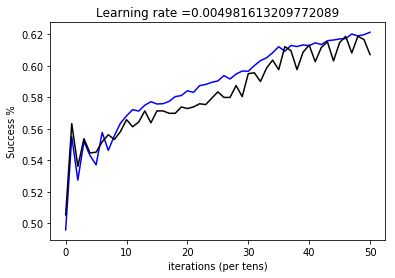

Cost after run 18, iteration 0: 0.658138, Time: 159.677219


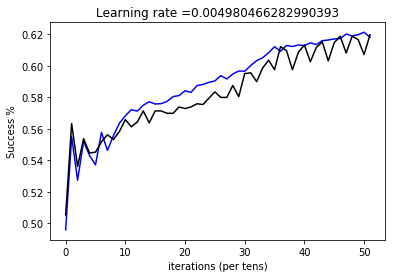

Cost after run 18, iteration 4: 0.658177, Time: 162.647898


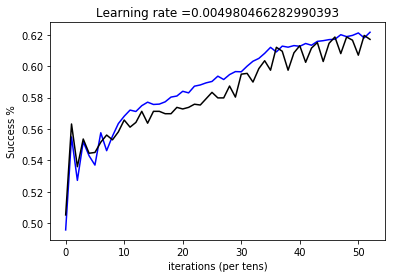

Cost after run 18, iteration 8: 0.657418, Time: 165.621983


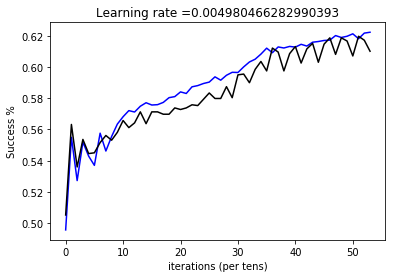

Cost after run 19, iteration 0: 0.657077, Time: 167.712285


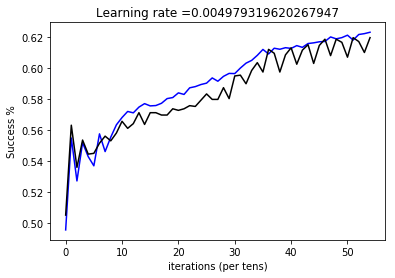

Cost after run 19, iteration 4: 0.657446, Time: 170.674943


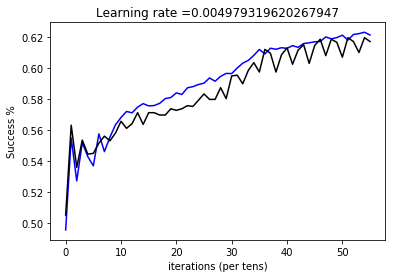

Cost after run 19, iteration 8: 0.656601, Time: 173.792301


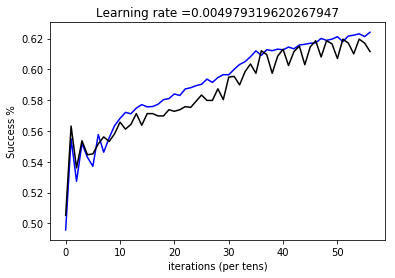

Cost after run 20, iteration 0: 0.656314, Time: 175.974533


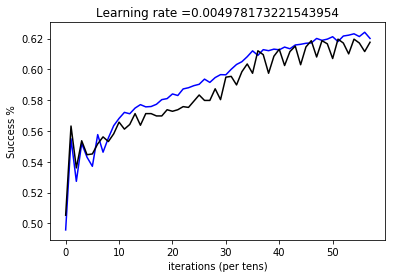

Cost after run 20, iteration 4: 0.656632, Time: 179.213813


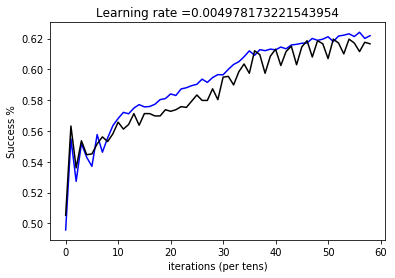

Cost after run 20, iteration 8: 0.655894, Time: 182.324223


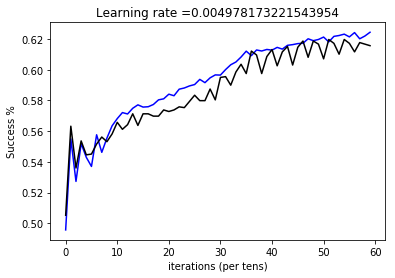

Cost after run 21, iteration 0: 0.655431, Time: 184.541142


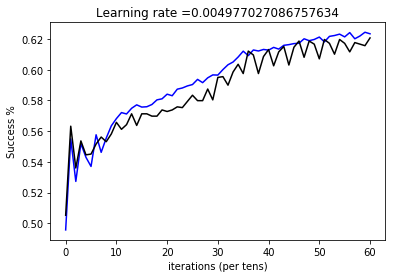

Cost after run 21, iteration 4: 0.655626, Time: 187.504081


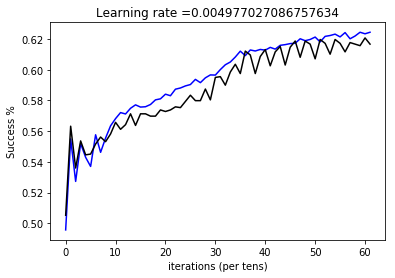

Cost after run 21, iteration 8: 0.655214, Time: 190.504795


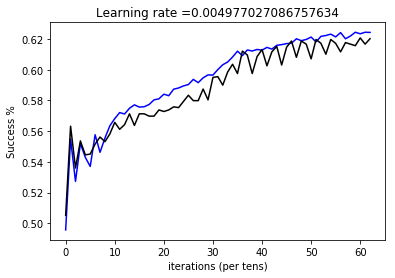

Cost after run 22, iteration 0: 0.654628, Time: 192.615720


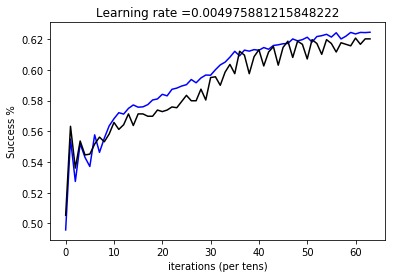

Cost after run 22, iteration 4: 0.654809, Time: 195.585572


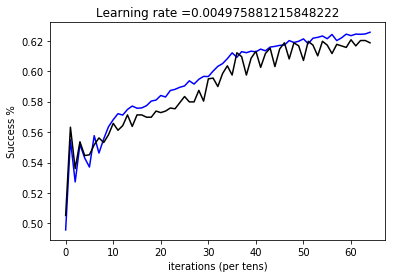

Cost after run 22, iteration 8: 0.654519, Time: 198.579467


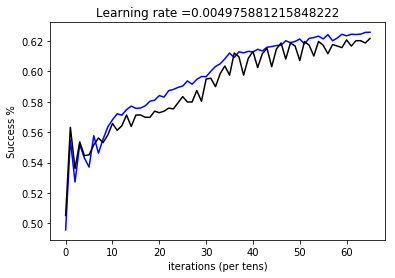

Cost after run 23, iteration 0: 0.653946, Time: 200.713187


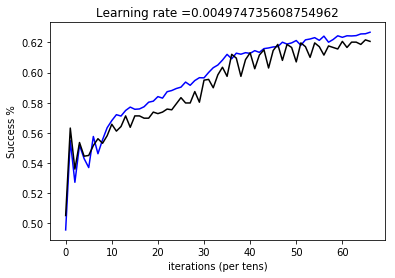

Cost after run 23, iteration 4: 0.654168, Time: 203.679666


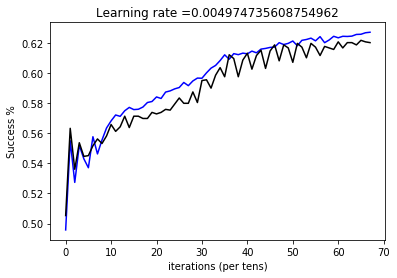

Cost after run 23, iteration 8: 0.653902, Time: 206.666446


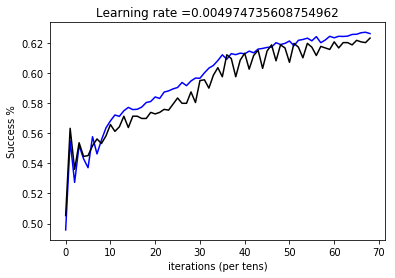

Cost after run 24, iteration 0: 0.653377, Time: 208.764914


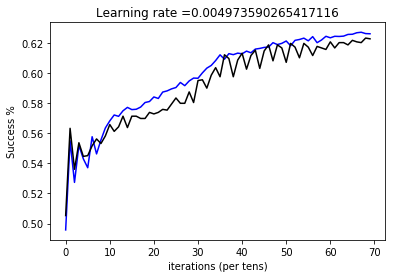

Cost after run 24, iteration 4: 0.653855, Time: 211.761079


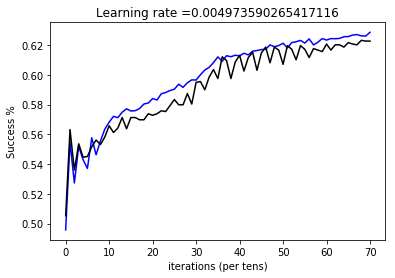

Cost after run 24, iteration 8: 0.653409, Time: 214.857187


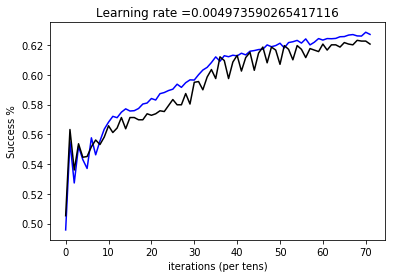

Cost after run 25, iteration 0: 0.652932, Time: 216.950543


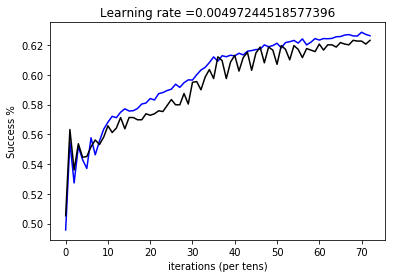

Cost after run 25, iteration 4: 0.653414, Time: 219.908043


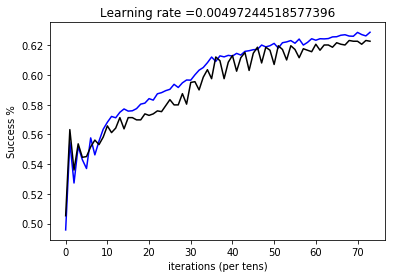

Cost after run 25, iteration 8: 0.653057, Time: 222.936284


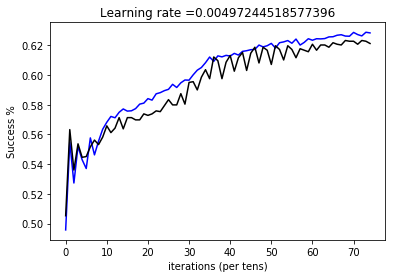

Cost after run 26, iteration 0: 0.652621, Time: 225.026516


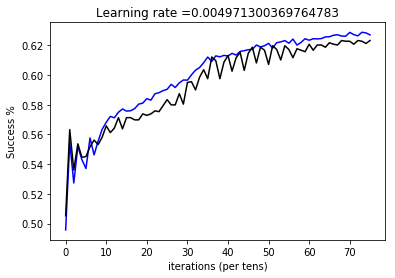

Cost after run 26, iteration 4: 0.653029, Time: 227.997008


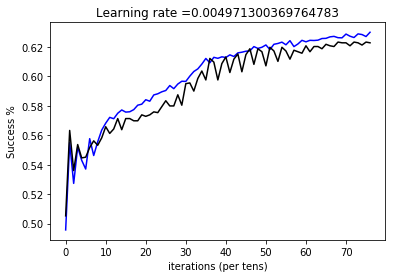

Cost after run 26, iteration 8: 0.652767, Time: 230.979591


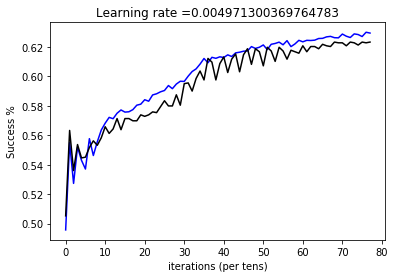

Cost after run 27, iteration 0: 0.652286, Time: 233.106123


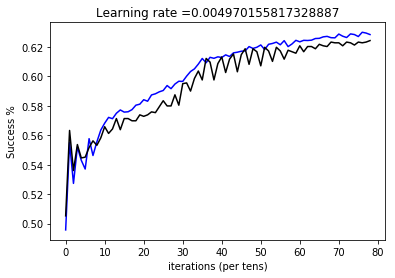

Cost after run 27, iteration 4: 0.652592, Time: 236.086963


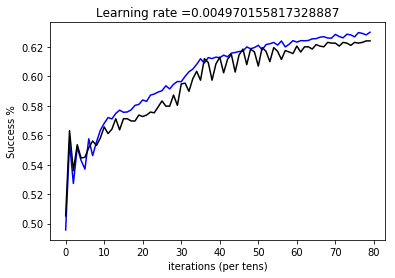

Cost after run 27, iteration 8: 0.652455, Time: 239.065814


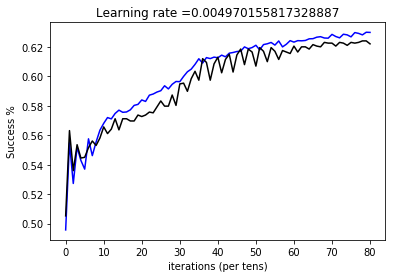

Cost after run 28, iteration 0: 0.651987, Time: 241.163405


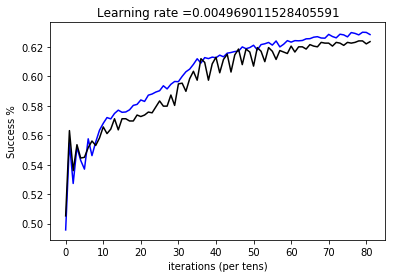

Cost after run 28, iteration 4: 0.652293, Time: 244.146216


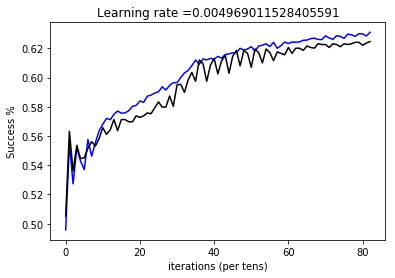

Cost after run 28, iteration 8: 0.652098, Time: 247.126836


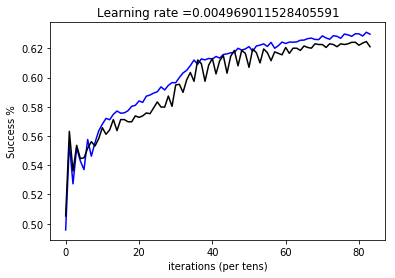

Cost after run 29, iteration 0: 0.651721, Time: 249.313680


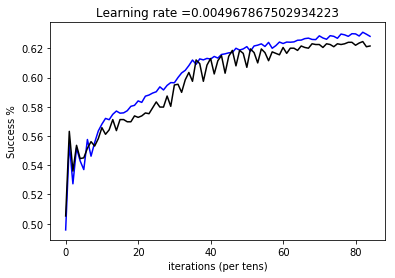

Cost after run 29, iteration 4: 0.652156, Time: 252.299556


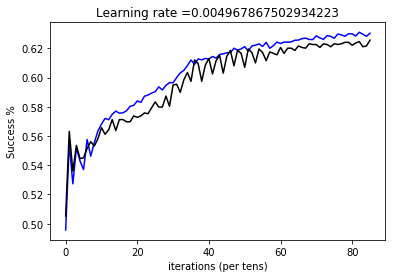

Cost after run 29, iteration 8: 0.651884, Time: 255.451053


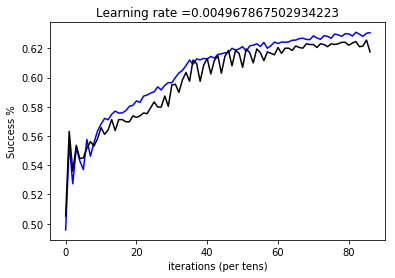

Cost after run 30, iteration 0: 0.651526, Time: 257.625009


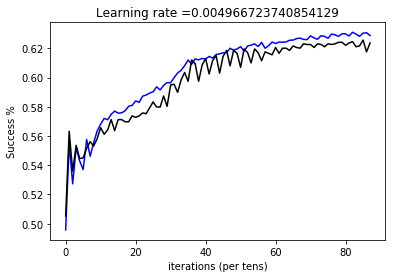

Cost after run 30, iteration 4: 0.651869, Time: 260.752211


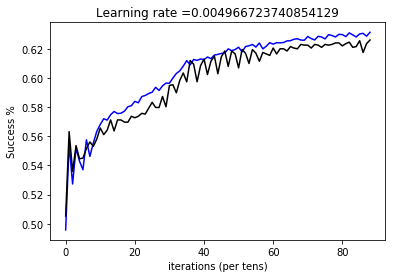

Cost after run 30, iteration 8: 0.651742, Time: 263.755588


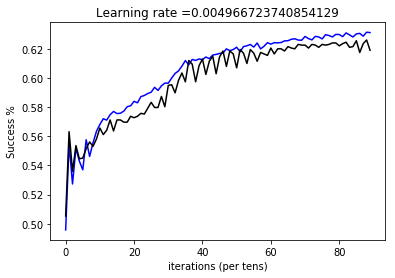

Cost after run 31, iteration 0: 0.651286, Time: 265.950592


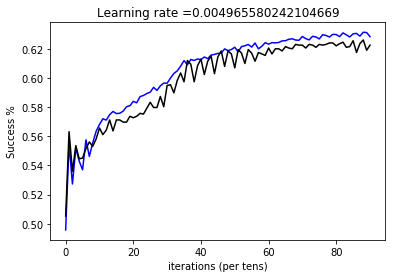

Cost after run 31, iteration 4: 0.651585, Time: 268.922560


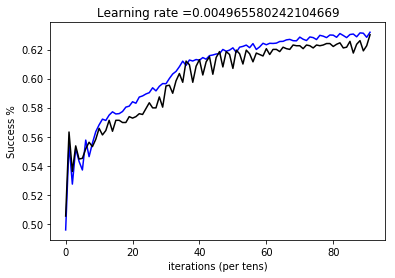

Cost after run 31, iteration 8: 0.651544, Time: 271.889339


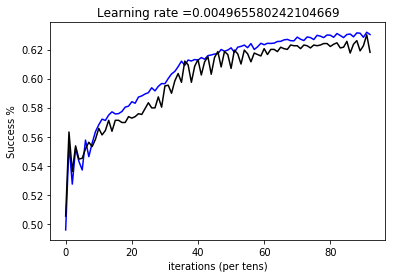

Cost after run 32, iteration 0: 0.651069, Time: 273.968894


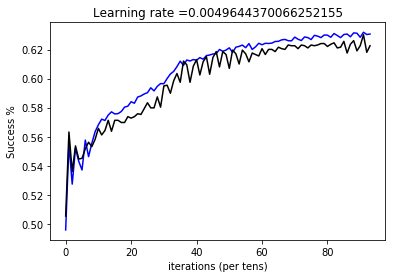

Cost after run 32, iteration 4: 0.651364, Time: 276.922093


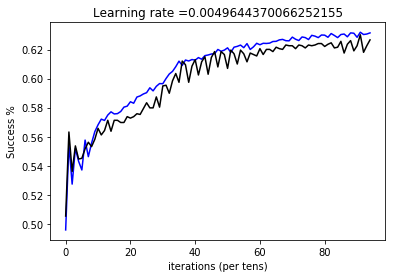

Cost after run 32, iteration 8: 0.651375, Time: 279.890443


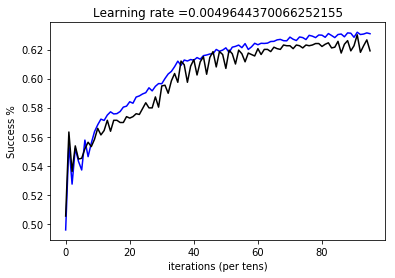

Cost after run 33, iteration 0: 0.650855, Time: 281.976436


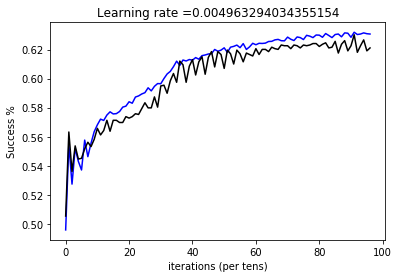

Cost after run 33, iteration 4: 0.651279, Time: 284.936996


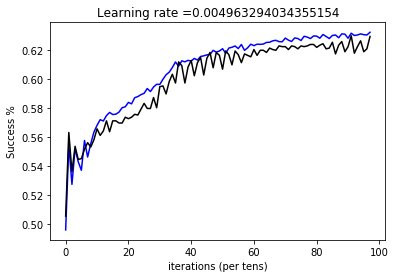

Cost after run 33, iteration 8: 0.651144, Time: 288.035620


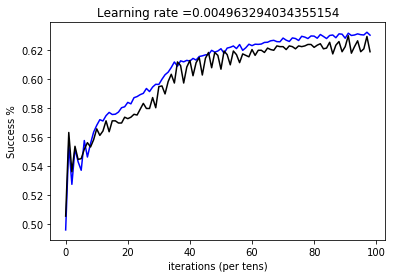

Cost after run 34, iteration 0: 0.650680, Time: 290.128605


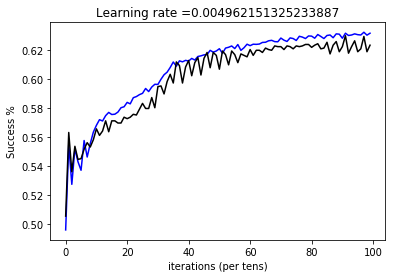

Cost after run 34, iteration 4: 0.651076, Time: 293.068983


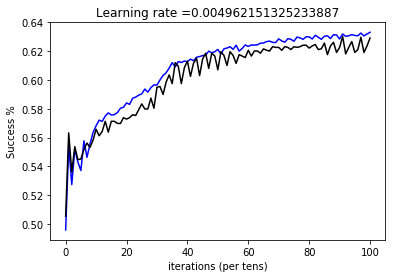

Cost after run 34, iteration 8: 0.651101, Time: 296.053252


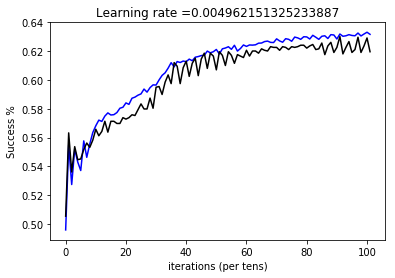

Cost after run 35, iteration 0: 0.650488, Time: 298.146829


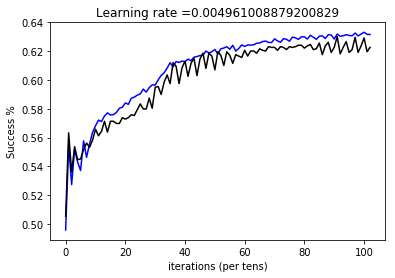

Cost after run 35, iteration 4: 0.650811, Time: 301.117813


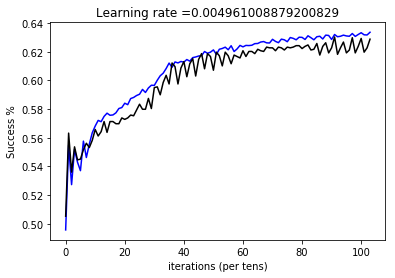

Cost after run 35, iteration 8: 0.650962, Time: 304.075873


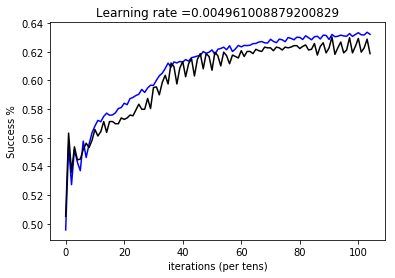

Cost after run 36, iteration 0: 0.650330, Time: 306.156999


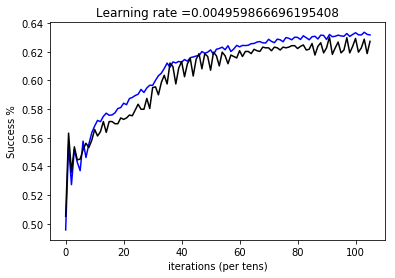

Cost after run 36, iteration 4: 0.650743, Time: 309.106472


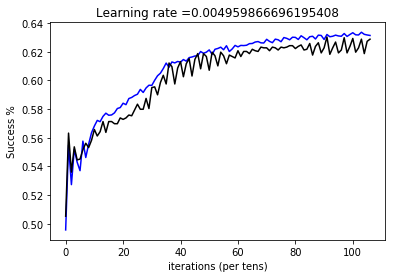

Cost after run 36, iteration 8: 0.650713, Time: 312.085915


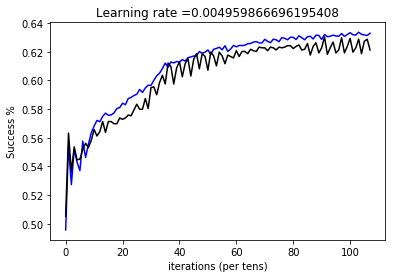

Cost after run 37, iteration 0: 0.650216, Time: 314.202433


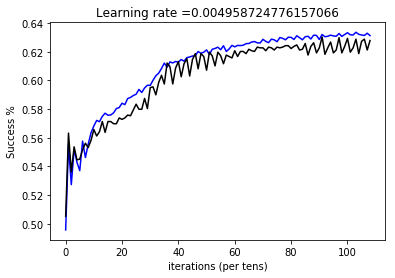

Cost after run 37, iteration 4: 0.650796, Time: 317.176253


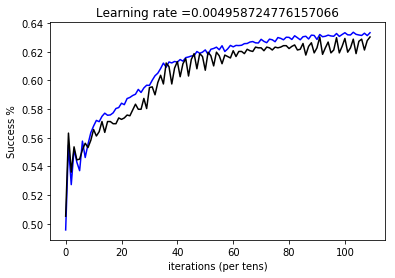

Cost after run 37, iteration 8: 0.650566, Time: 320.191727


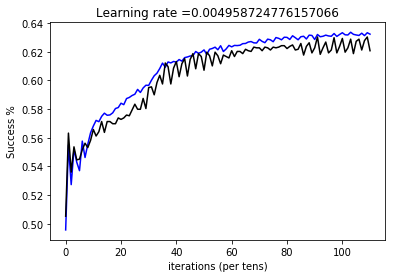

Cost after run 38, iteration 0: 0.650143, Time: 322.400654


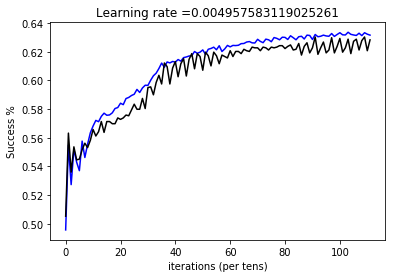

Cost after run 38, iteration 4: 0.650611, Time: 325.372279


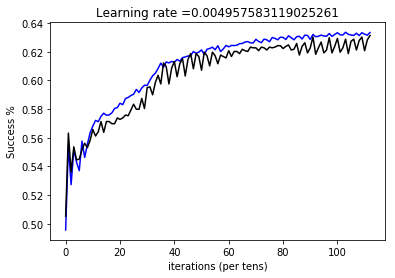

Cost after run 38, iteration 8: 0.650450, Time: 328.398703


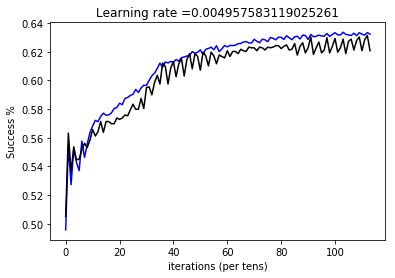

Cost after run 39, iteration 0: 0.650058, Time: 330.490257


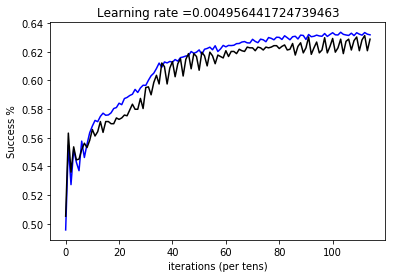

Cost after run 39, iteration 4: 0.650663, Time: 333.573964


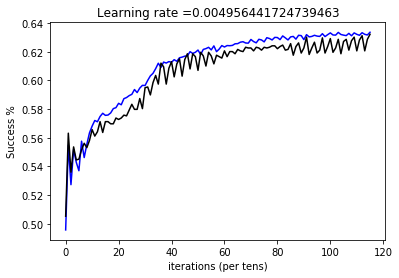

Cost after run 39, iteration 8: 0.650430, Time: 336.727617


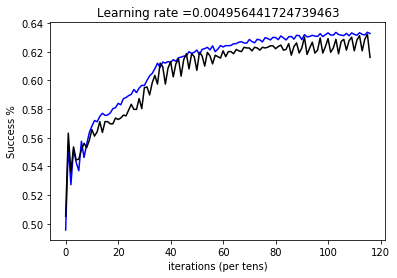

Cost after run 40, iteration 0: 0.649984, Time: 338.961068


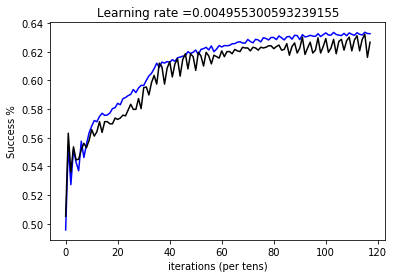

Cost after run 40, iteration 4: 0.650406, Time: 342.112660


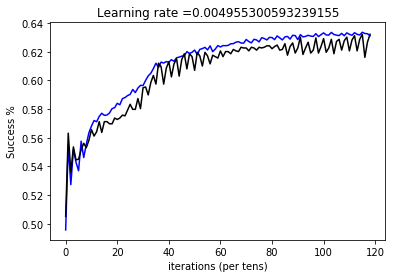

Cost after run 40, iteration 8: 0.650420, Time: 345.176918


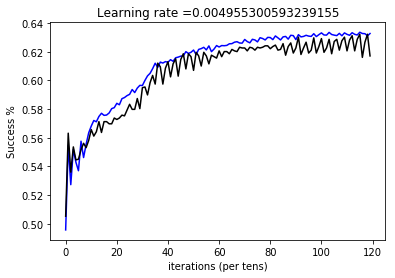

Cost after run 41, iteration 0: 0.649902, Time: 347.421741


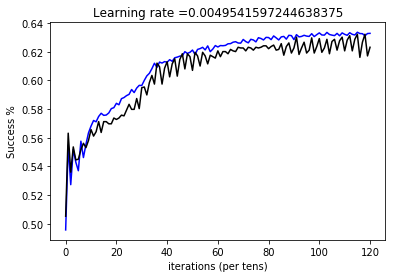

Cost after run 41, iteration 4: 0.650247, Time: 350.433047


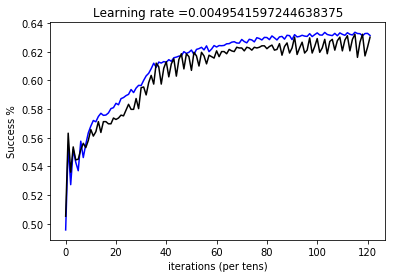

Cost after run 41, iteration 8: 0.650305, Time: 353.444870


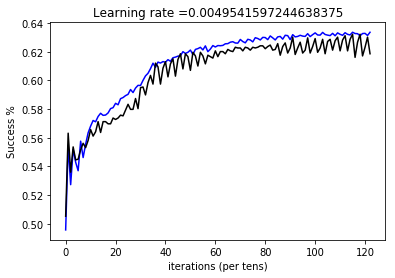

Cost after run 42, iteration 0: 0.649791, Time: 355.553896


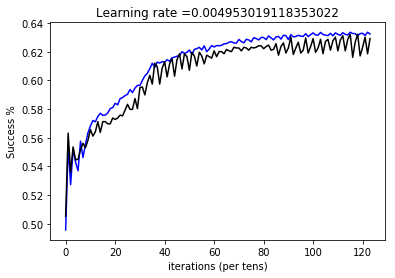

Cost after run 42, iteration 4: 0.650239, Time: 358.633756


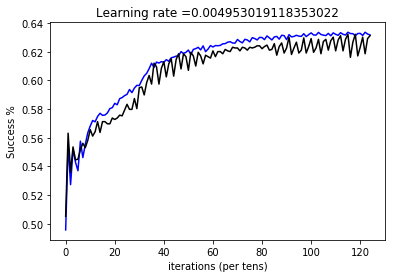

Cost after run 42, iteration 8: 0.650267, Time: 361.634818


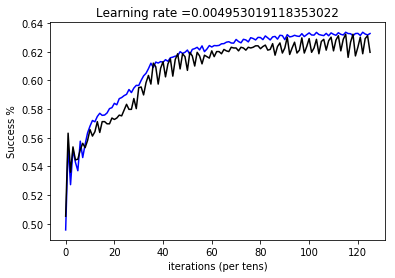

Cost after run 43, iteration 0: 0.649728, Time: 363.720982


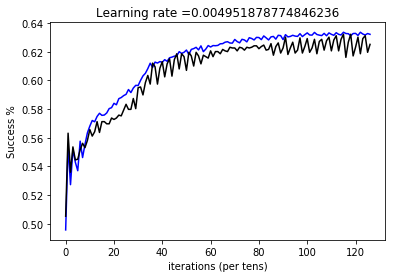

Cost after run 43, iteration 4: 0.650092, Time: 366.696450


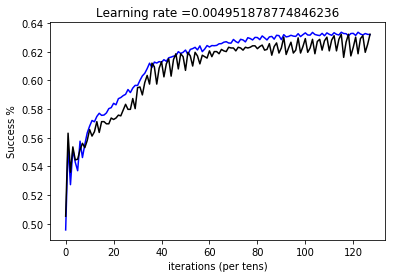

Cost after run 43, iteration 8: 0.650209, Time: 369.669235


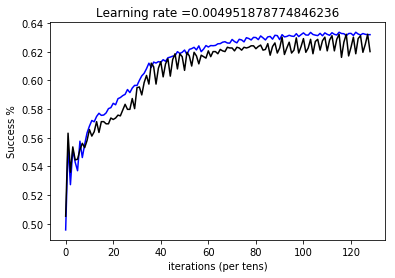

Cost after run 44, iteration 0: 0.649636, Time: 371.760185


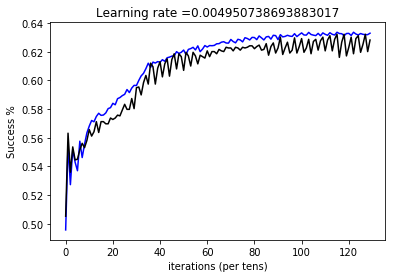

Cost after run 44, iteration 4: 0.650042, Time: 374.732289


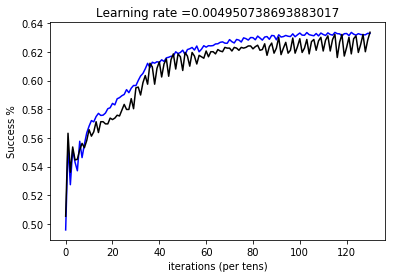

Cost after run 44, iteration 8: 0.650047, Time: 377.733547


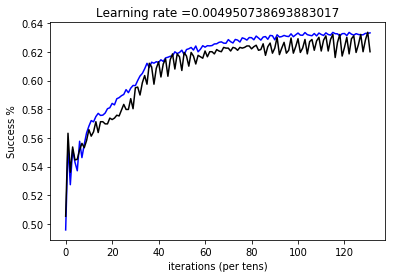

Cost after run 45, iteration 0: 0.649580, Time: 379.828430


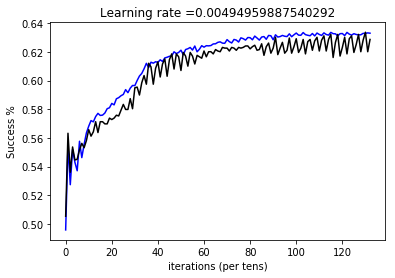

Cost after run 45, iteration 4: 0.649982, Time: 382.827618


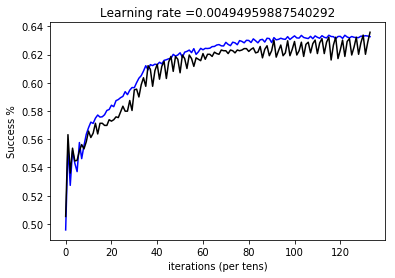

Cost after run 45, iteration 8: 0.650004, Time: 385.820429


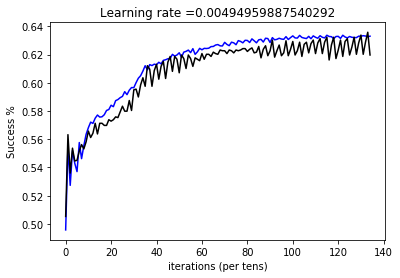

Cost after run 46, iteration 0: 0.649525, Time: 387.921345


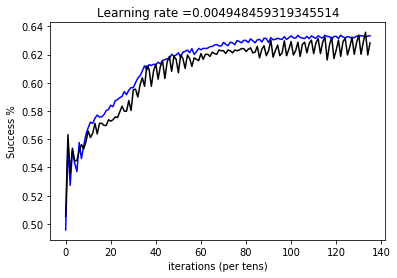

Cost after run 46, iteration 4: 0.649952, Time: 390.891384


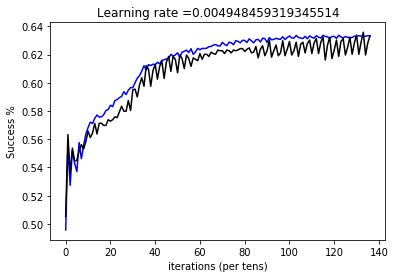

Cost after run 46, iteration 8: 0.649947, Time: 393.994898


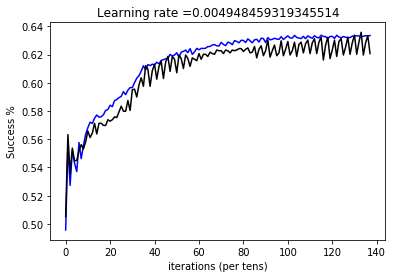

Cost after run 47, iteration 0: 0.649500, Time: 396.102586


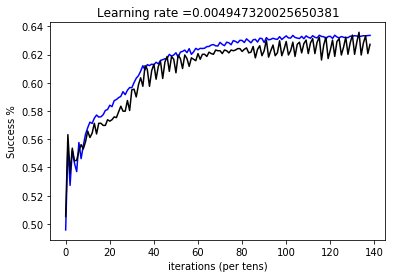

Cost after run 47, iteration 4: 0.649853, Time: 399.068690


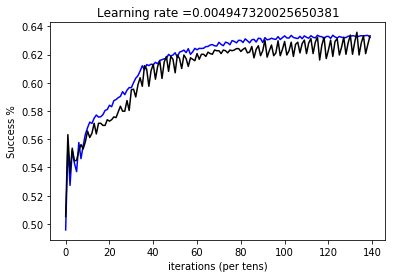

Cost after run 47, iteration 8: 0.649921, Time: 402.048251


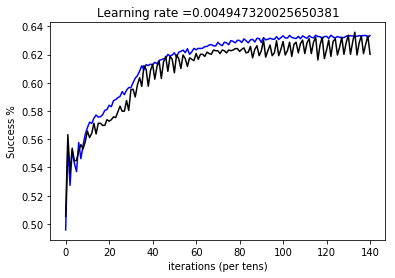

Cost after run 48, iteration 0: 0.649433, Time: 404.158896


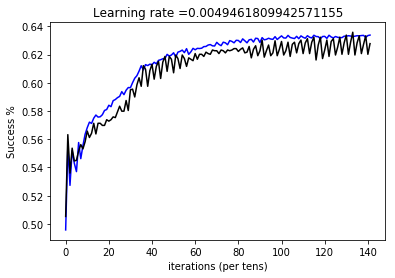

Cost after run 48, iteration 4: 0.649895, Time: 407.137348


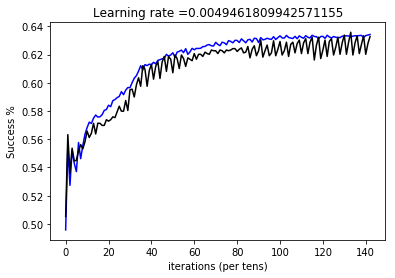

Cost after run 48, iteration 8: 0.649829, Time: 410.110825


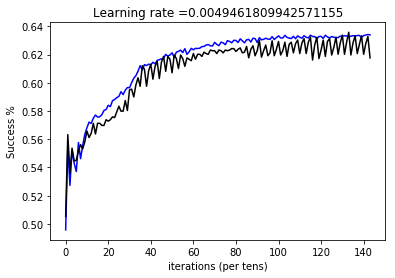

Cost after run 49, iteration 0: 0.649402, Time: 412.198890


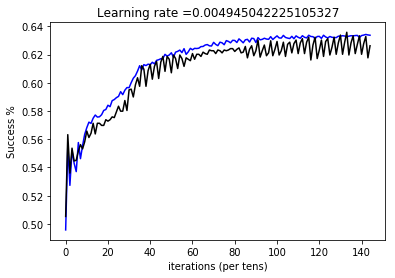

Cost after run 49, iteration 4: 0.649807, Time: 415.317704


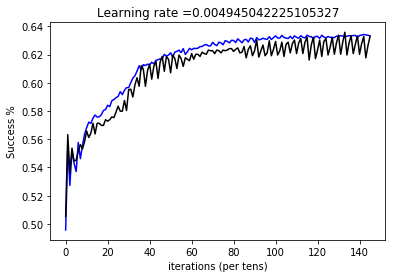

Cost after run 49, iteration 8: 0.649888, Time: 418.486052


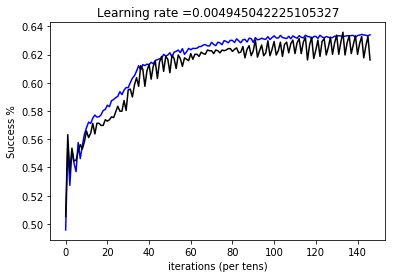

Cost after run 50, iteration 0: 0.649325, Time: 420.689811


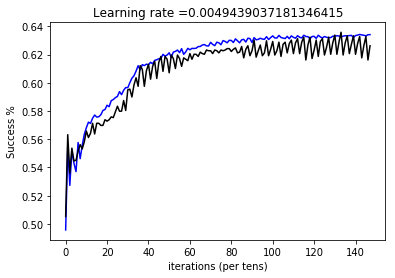

Cost after run 50, iteration 4: 0.649742, Time: 423.753174


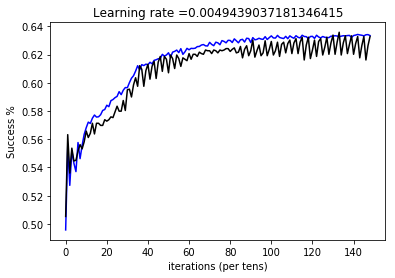

Cost after run 50, iteration 8: 0.649803, Time: 426.846157


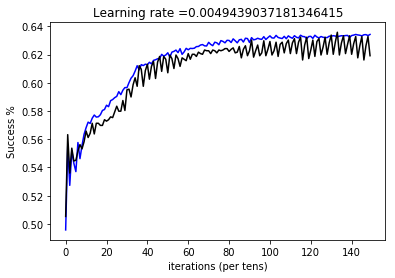

Cost after run 51, iteration 0: 0.649284, Time: 429.081568


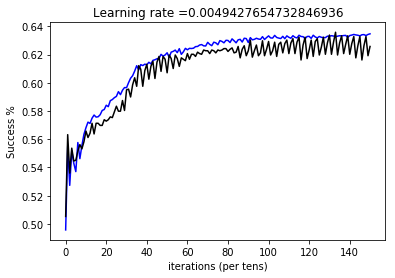

Cost after run 51, iteration 4: 0.649703, Time: 432.173962


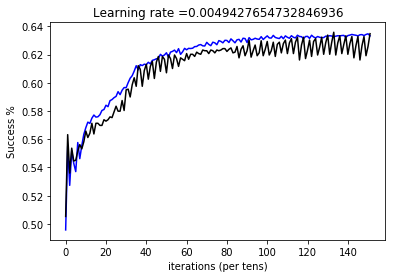

Cost after run 51, iteration 8: 0.649799, Time: 435.393210


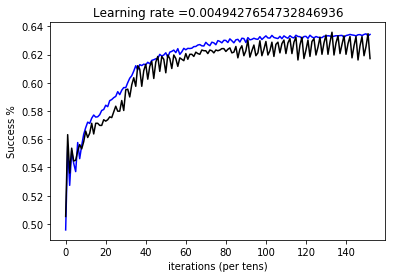

Cost after run 52, iteration 0: 0.649231, Time: 437.539004


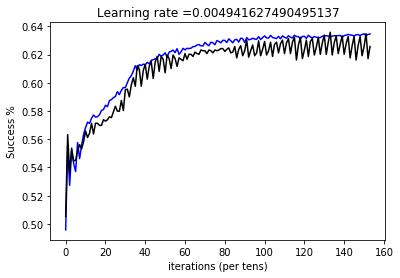

Cost after run 52, iteration 4: 0.649568, Time: 440.525409


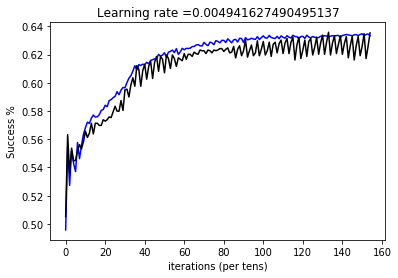

Cost after run 52, iteration 8: 0.649768, Time: 443.546369


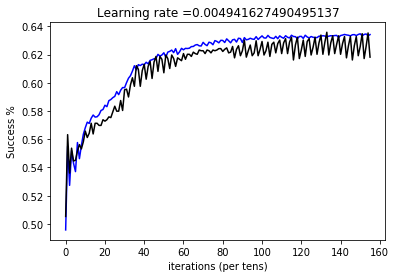

Cost after run 53, iteration 0: 0.649194, Time: 445.676142


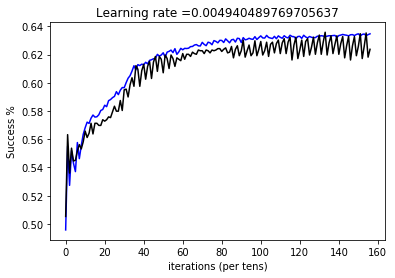

Cost after run 53, iteration 4: 0.649554, Time: 448.661557


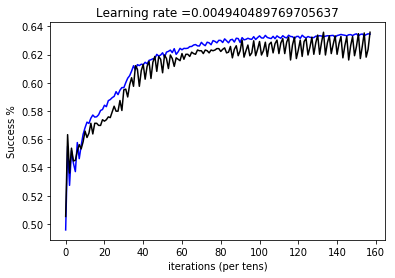

Cost after run 53, iteration 8: 0.649695, Time: 451.658515


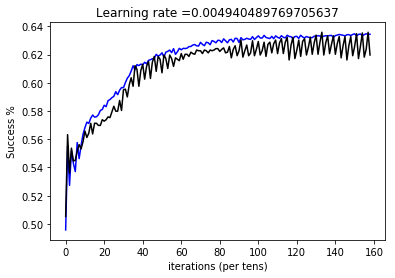

Cost after run 54, iteration 0: 0.649164, Time: 453.765692


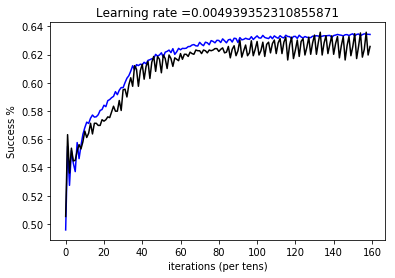

Cost after run 54, iteration 4: 0.649508, Time: 456.929366


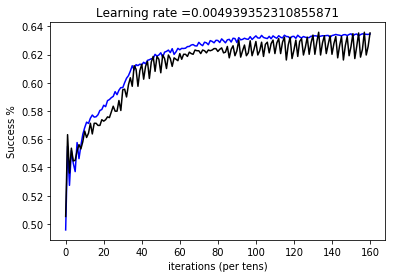

Cost after run 54, iteration 8: 0.649712, Time: 460.223900


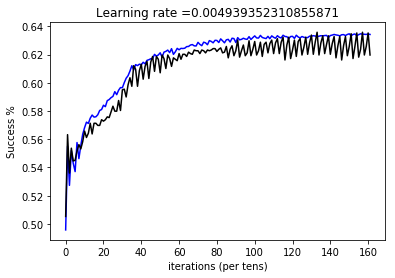

Cost after run 55, iteration 0: 0.649122, Time: 462.441889


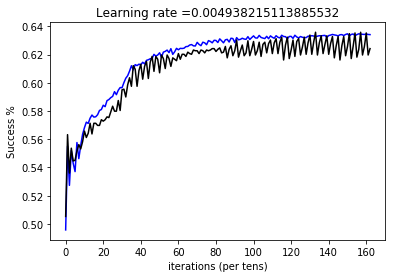

Cost after run 55, iteration 4: 0.649413, Time: 465.627065


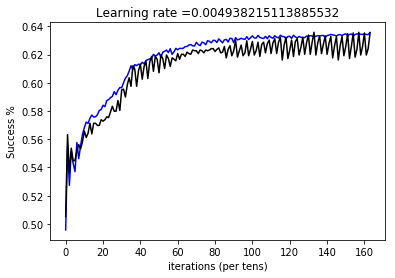

Cost after run 55, iteration 8: 0.649698, Time: 468.617731


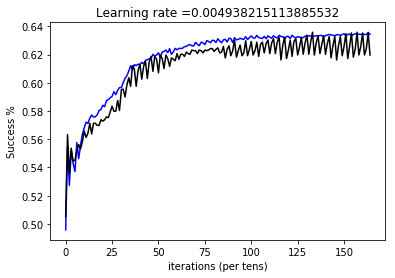

Cost after run 56, iteration 0: 0.649089, Time: 470.705189


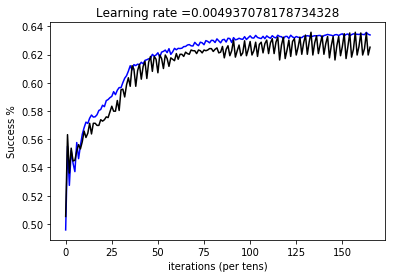

Cost after run 56, iteration 4: 0.649393, Time: 473.667700


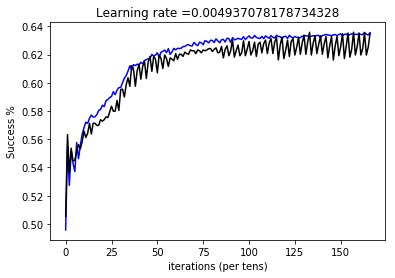

Cost after run 56, iteration 8: 0.649647, Time: 476.667692


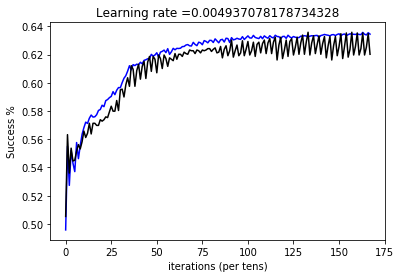

Cost after run 57, iteration 0: 0.649060, Time: 478.775611


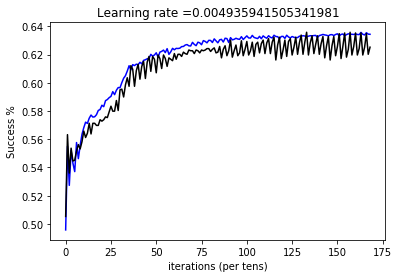

Cost after run 57, iteration 4: 0.649361, Time: 481.739690


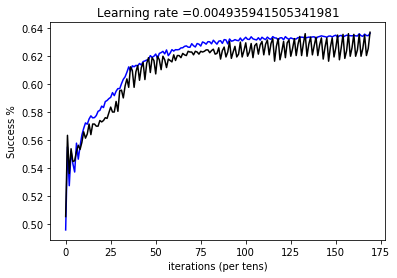

Cost after run 57, iteration 8: 0.649616, Time: 484.694663


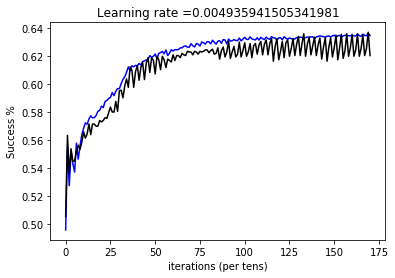

Cost after run 58, iteration 0: 0.649033, Time: 486.779445


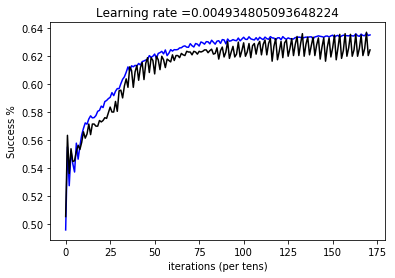

Cost after run 58, iteration 4: 0.649387, Time: 489.726410


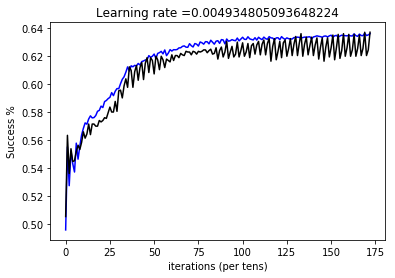

Cost after run 58, iteration 8: 0.649581, Time: 492.800830


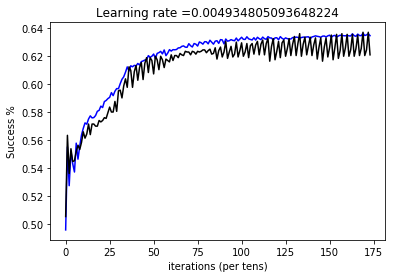

Cost after run 59, iteration 0: 0.649015, Time: 494.977247


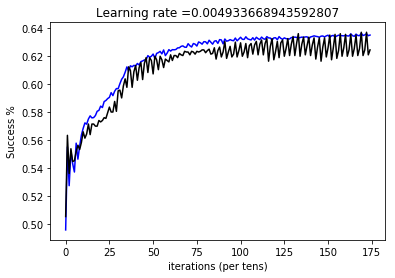

Cost after run 59, iteration 4: 0.649352, Time: 498.147759


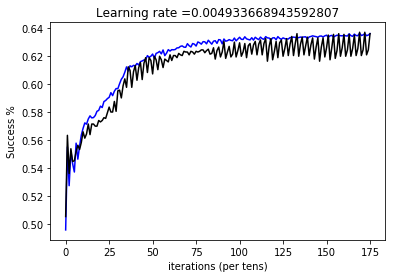

Cost after run 59, iteration 8: 0.649629, Time: 501.295564


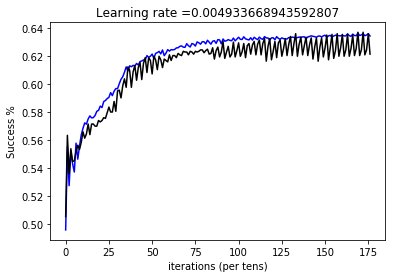

Cost after run 60, iteration 0: 0.648988, Time: 503.494276


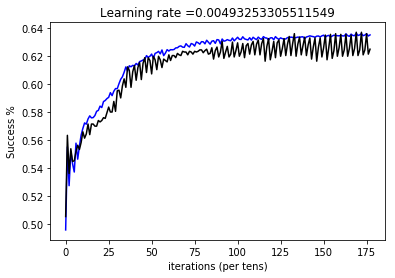

Cost after run 60, iteration 4: 0.649298, Time: 506.458811


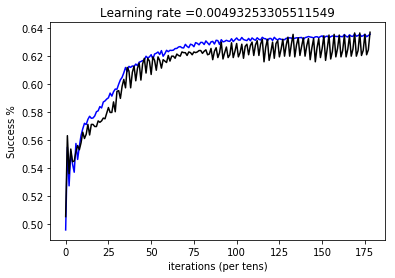

Cost after run 60, iteration 8: 0.649601, Time: 509.462859


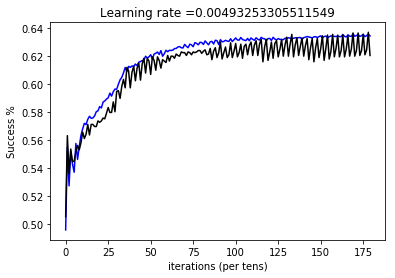

Cost after run 61, iteration 0: 0.648967, Time: 511.671690


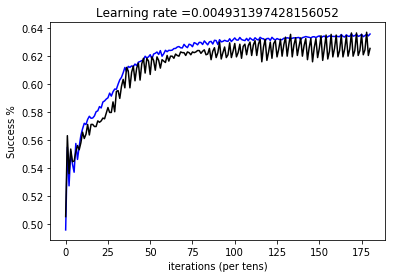

Cost after run 61, iteration 4: 0.649307, Time: 514.598529


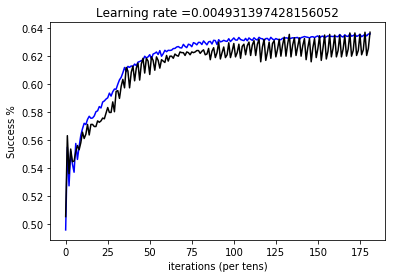

Cost after run 61, iteration 8: 0.649630, Time: 517.562550


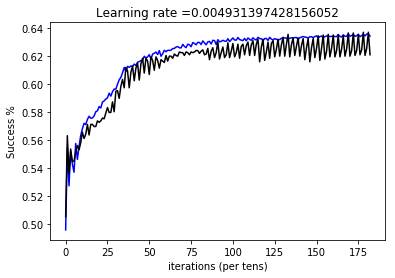

Cost after run 62, iteration 0: 0.648969, Time: 519.663745


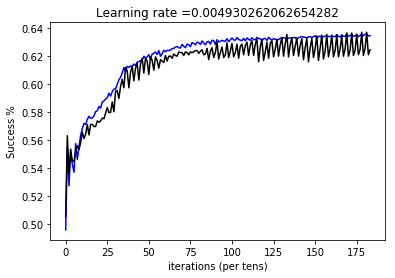

Cost after run 62, iteration 4: 0.649289, Time: 522.599894


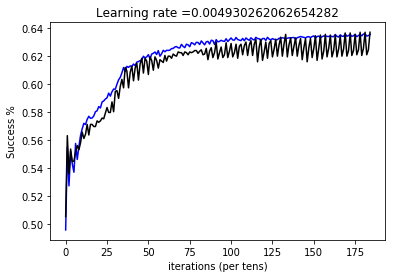

Cost after run 62, iteration 8: 0.649557, Time: 525.669652


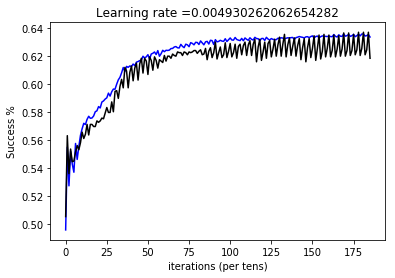

Cost after run 63, iteration 0: 0.648976, Time: 527.766888


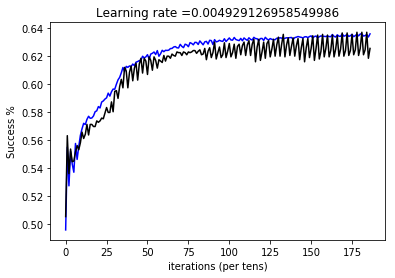

Cost after run 63, iteration 4: 0.649288, Time: 530.754830


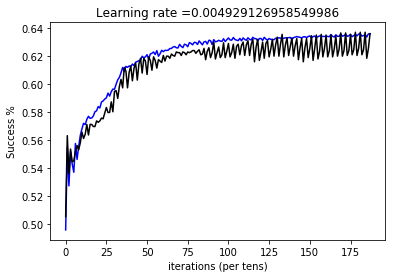

Cost after run 63, iteration 8: 0.649648, Time: 533.693789


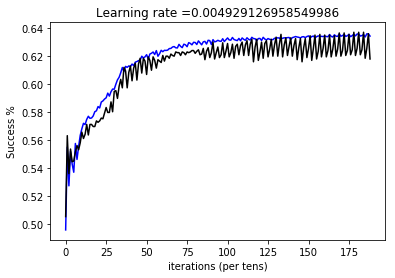

Cost after run 64, iteration 0: 0.648927, Time: 535.782956


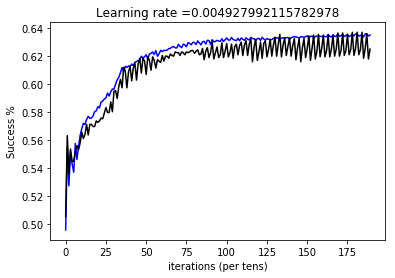

Cost after run 64, iteration 4: 0.649205, Time: 538.718095


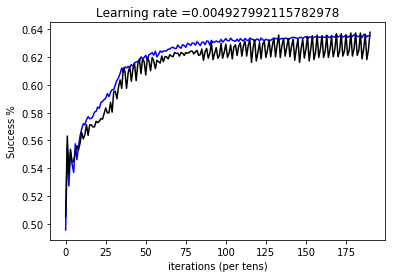

Cost after run 64, iteration 8: 0.649635, Time: 541.685240


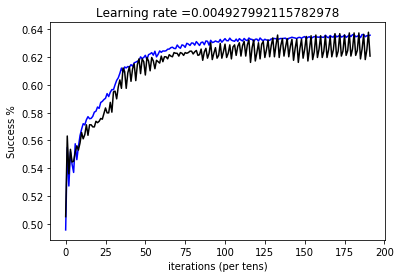

Cost after run 65, iteration 0: 0.648929, Time: 543.781169


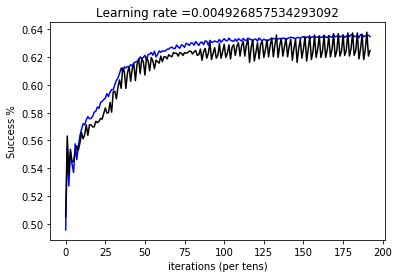

Cost after run 65, iteration 4: 0.649263, Time: 546.732229


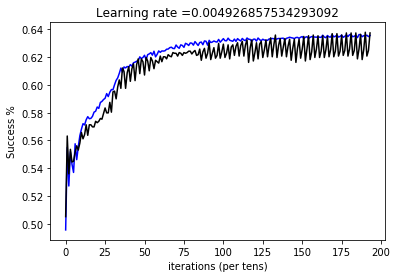

Cost after run 65, iteration 8: 0.649643, Time: 549.690431


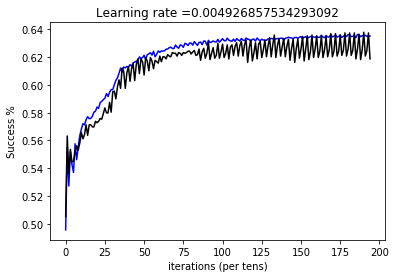

Cost after run 66, iteration 0: 0.648925, Time: 551.816780


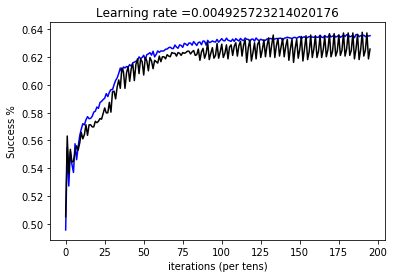

Cost after run 66, iteration 4: 0.649159, Time: 554.763629


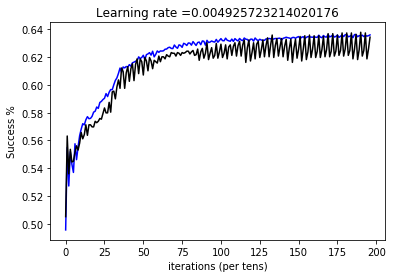

Cost after run 66, iteration 8: 0.649724, Time: 557.850217


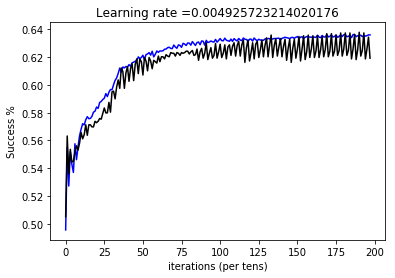

Cost after run 67, iteration 0: 0.648892, Time: 559.943047


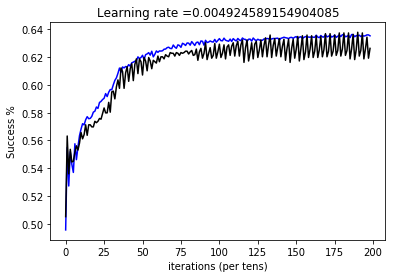

Cost after run 67, iteration 4: 0.649099, Time: 562.925301


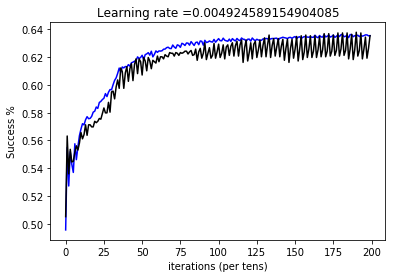

Cost after run 67, iteration 8: 0.649634, Time: 565.897861


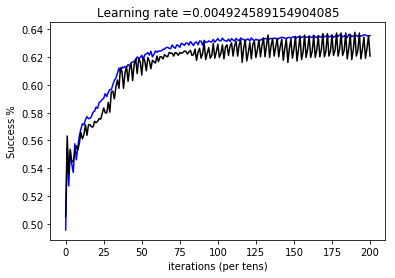

Cost after run 68, iteration 0: 0.648872, Time: 568.021071


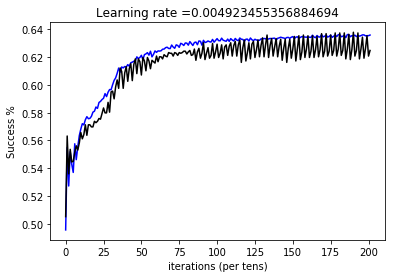

Cost after run 68, iteration 4: 0.649176, Time: 570.979383


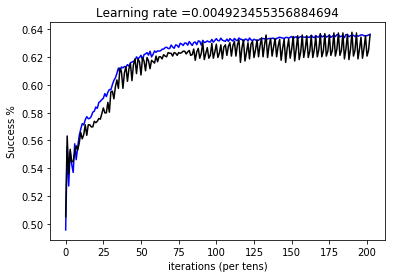

Cost after run 68, iteration 8: 0.649560, Time: 574.027484


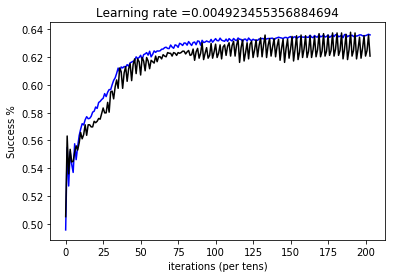

Cost after run 69, iteration 0: 0.648866, Time: 576.236830


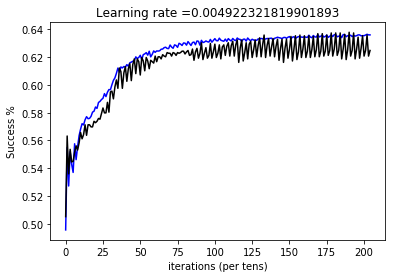

Cost after run 69, iteration 4: 0.649225, Time: 579.402783


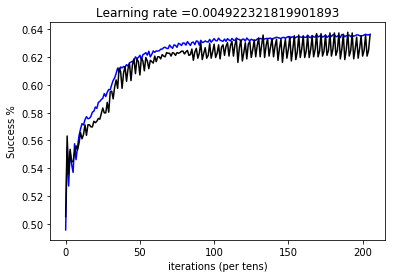

Cost after run 69, iteration 8: 0.649582, Time: 582.549259


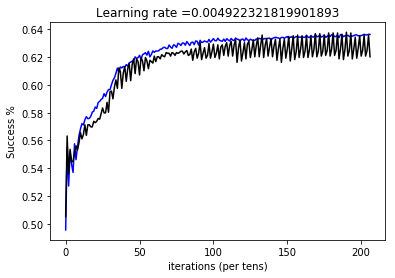

Cost after run 70, iteration 0: 0.648884, Time: 584.674119


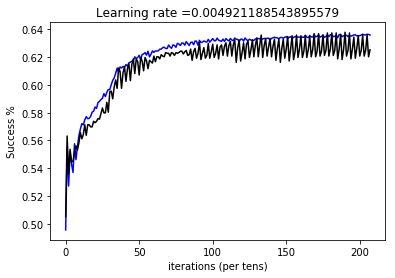

Cost after run 70, iteration 4: 0.649151, Time: 587.653853


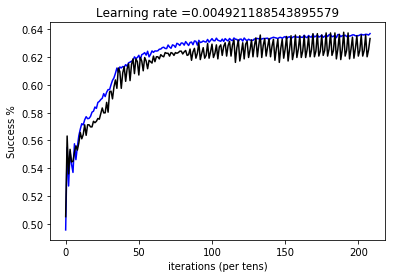

Cost after run 70, iteration 8: 0.649662, Time: 590.713087


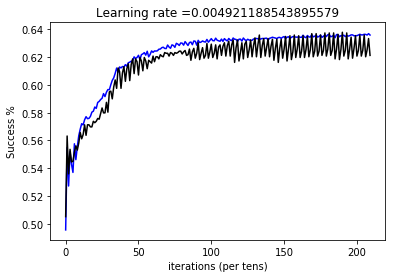

Cost after run 71, iteration 0: 0.648846, Time: 592.909842


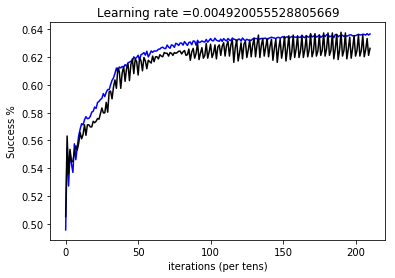

Cost after run 71, iteration 4: 0.649148, Time: 595.847988


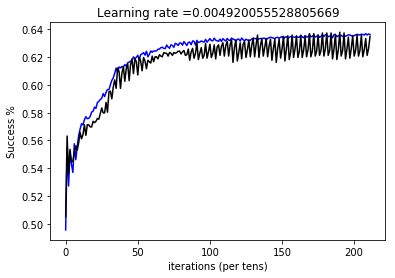

Cost after run 71, iteration 8: 0.649592, Time: 598.805942


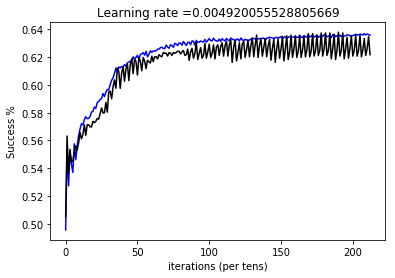

Cost after run 72, iteration 0: 0.648864, Time: 600.878919


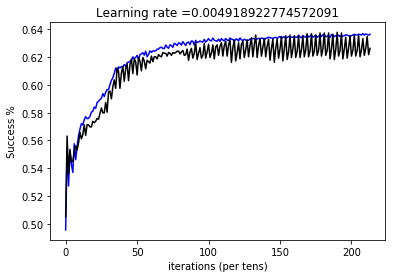

Cost after run 72, iteration 4: 0.649209, Time: 603.810261


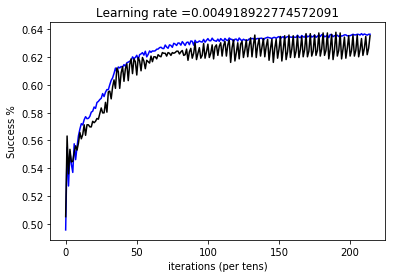

Cost after run 72, iteration 8: 0.649604, Time: 606.796418


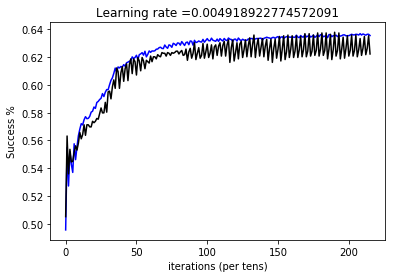

Cost after run 73, iteration 0: 0.648838, Time: 608.876099


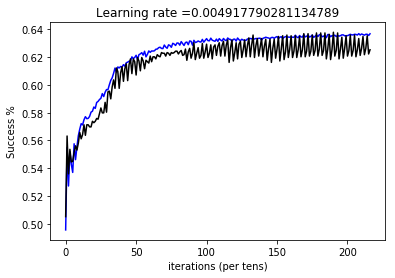

Cost after run 73, iteration 4: 0.649169, Time: 611.819542


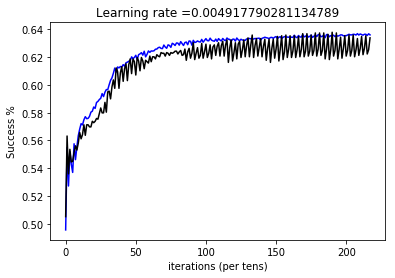

Cost after run 73, iteration 8: 0.649592, Time: 614.828837


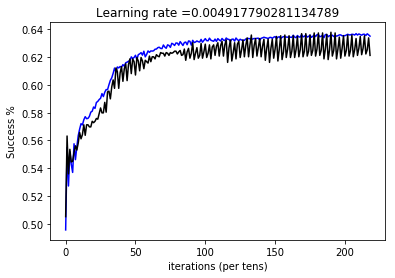

Cost after run 74, iteration 0: 0.648850, Time: 616.930498


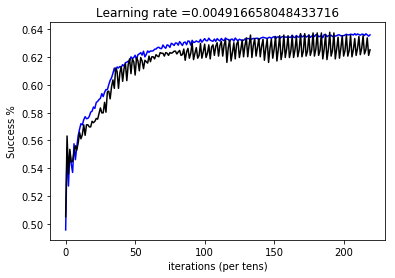

Cost after run 74, iteration 4: 0.649202, Time: 619.924395


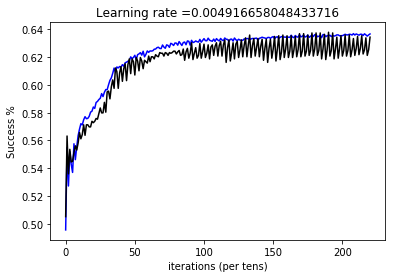

Cost after run 74, iteration 8: 0.649604, Time: 622.892856


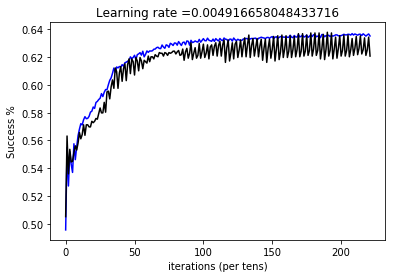

Cost after run 75, iteration 0: 0.648857, Time: 625.098141


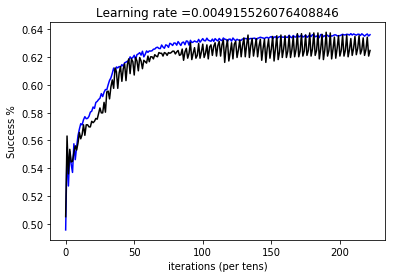

Cost after run 75, iteration 4: 0.649112, Time: 628.075712


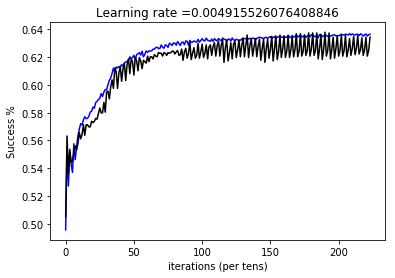

Cost after run 75, iteration 8: 0.649668, Time: 631.034466


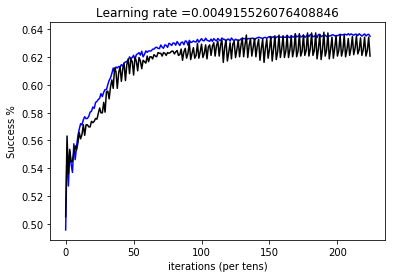

Cost after run 76, iteration 0: 0.648850, Time: 633.119127


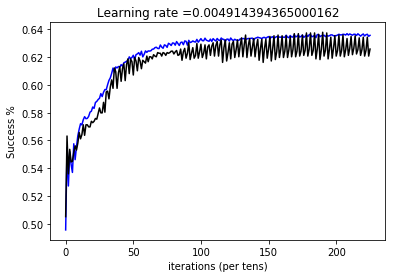

Cost after run 76, iteration 4: 0.649104, Time: 636.077977


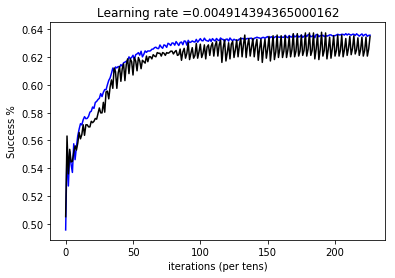

Cost after run 76, iteration 8: 0.649657, Time: 639.045135


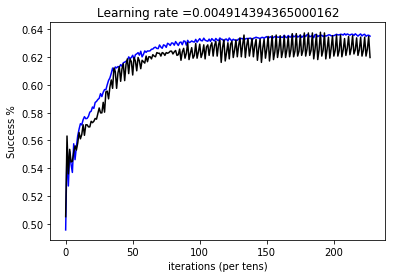

Cost after run 77, iteration 0: 0.648859, Time: 641.125967


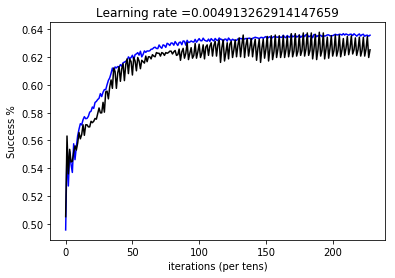

Cost after run 77, iteration 4: 0.649132, Time: 644.063722


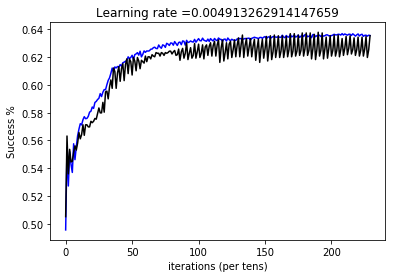

Cost after run 77, iteration 8: 0.649671, Time: 647.046357


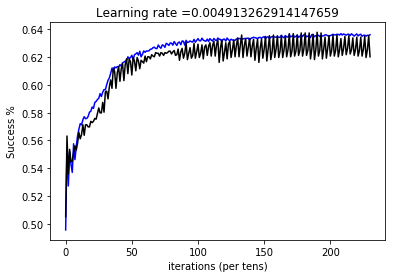

Cost after run 78, iteration 0: 0.648842, Time: 649.117090


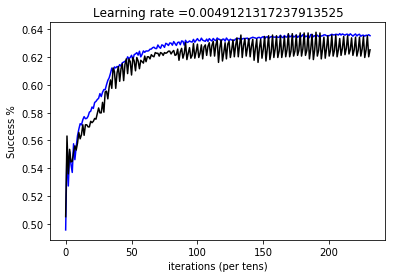

Cost after run 78, iteration 4: 0.649079, Time: 652.055106


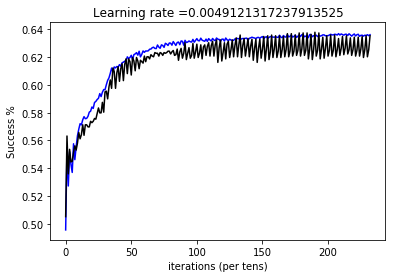

Cost after run 78, iteration 8: 0.649623, Time: 655.112667


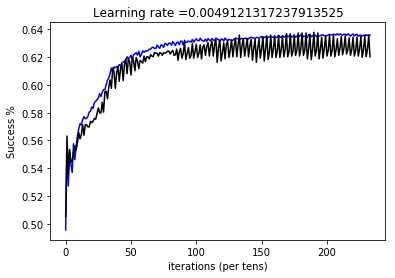

Cost after run 79, iteration 0: 0.648814, Time: 657.346152


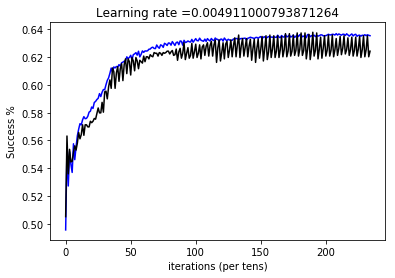

Cost after run 79, iteration 4: 0.649060, Time: 660.592665


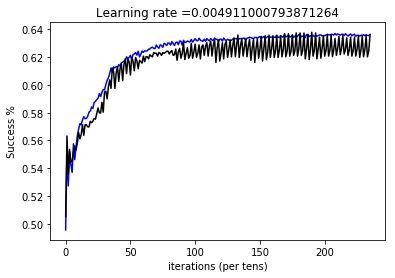

Cost after run 79, iteration 8: 0.649580, Time: 663.763200


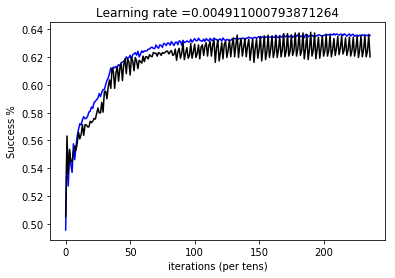

Cost after run 80, iteration 0: 0.648799, Time: 665.882703


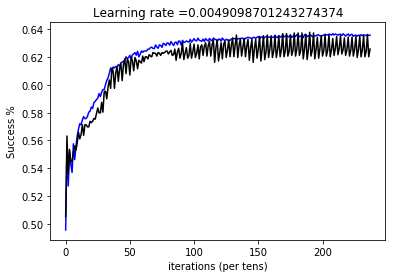

Cost after run 80, iteration 4: 0.649112, Time: 668.816154


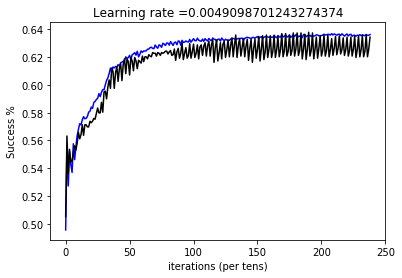

Cost after run 80, iteration 8: 0.649595, Time: 671.789625


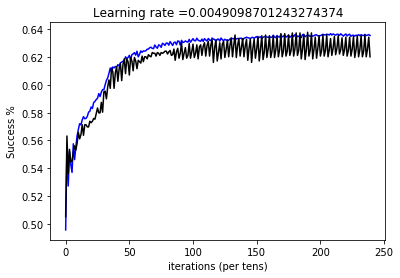

Cost after run 81, iteration 0: 0.648793, Time: 673.987638


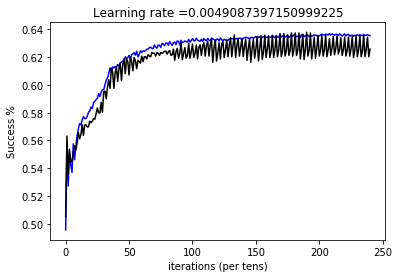

Cost after run 81, iteration 4: 0.649109, Time: 676.917975


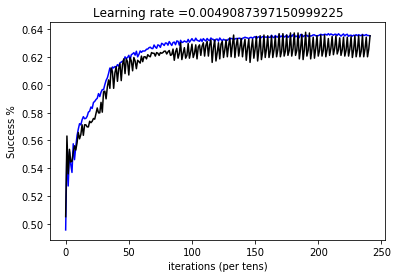

Cost after run 81, iteration 8: 0.649557, Time: 679.889160


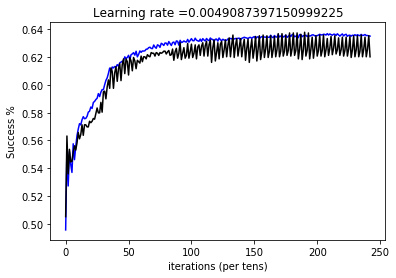

Cost after run 82, iteration 0: 0.648772, Time: 681.972098


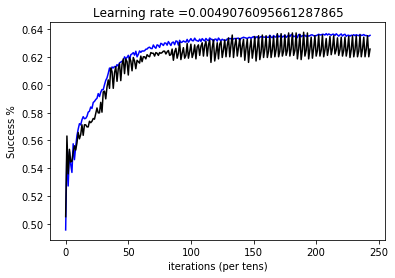

Cost after run 82, iteration 4: 0.649055, Time: 684.912186


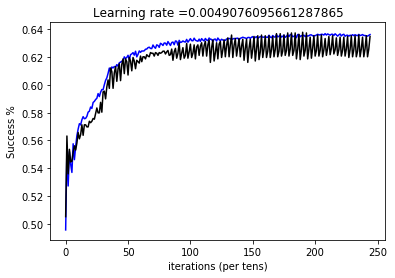

Cost after run 82, iteration 8: 0.649531, Time: 687.891166


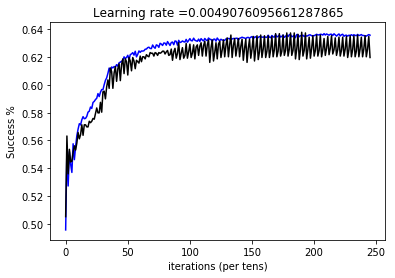

Cost after run 83, iteration 0: 0.648786, Time: 689.978207


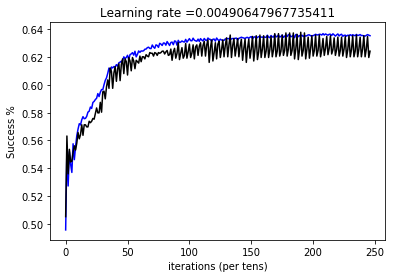

Cost after run 83, iteration 4: 0.649144, Time: 692.934591


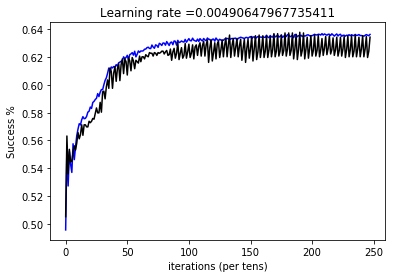

Cost after run 83, iteration 8: 0.649504, Time: 695.982543


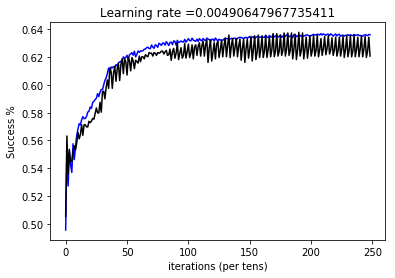

Cost after run 84, iteration 0: 0.648774, Time: 698.085773


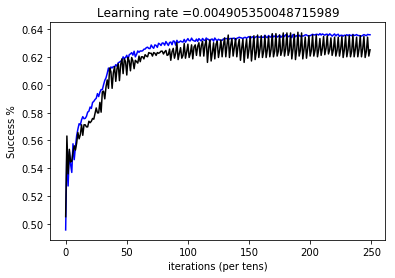

Cost after run 84, iteration 4: 0.649045, Time: 701.053751


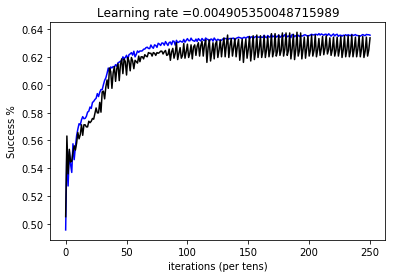

Cost after run 84, iteration 8: 0.649535, Time: 704.015364


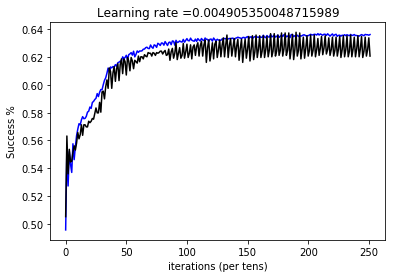

Cost after run 85, iteration 0: 0.648731, Time: 706.109133


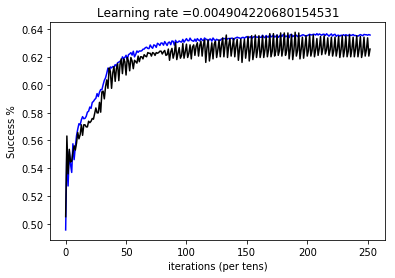

Cost after run 85, iteration 4: 0.648978, Time: 709.061881


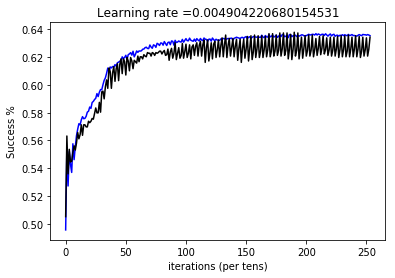

Cost after run 85, iteration 8: 0.649401, Time: 712.021721


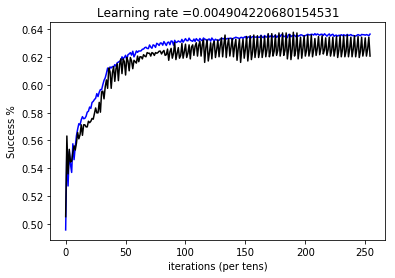

Cost after run 86, iteration 0: 0.648708, Time: 714.115492


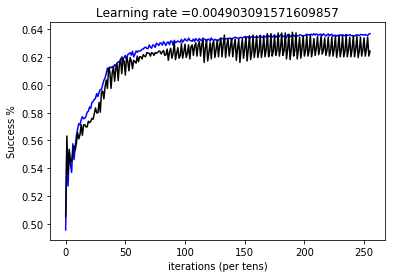

Cost after run 86, iteration 4: 0.649032, Time: 717.073308


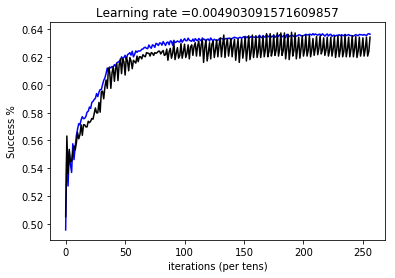

Cost after run 86, iteration 8: 0.649407, Time: 720.059417


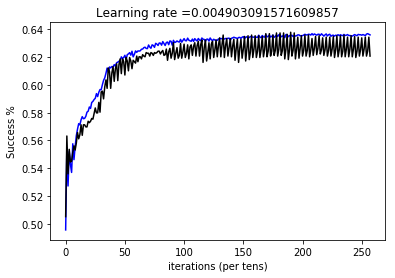

Cost after run 87, iteration 0: 0.648683, Time: 722.154186


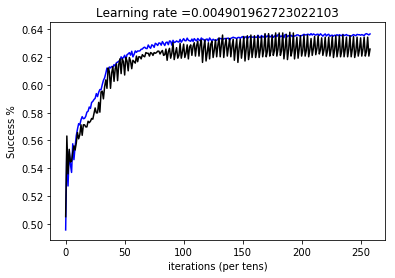

Cost after run 87, iteration 4: 0.648925, Time: 725.130285


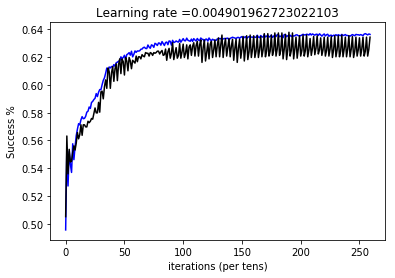

Cost after run 87, iteration 8: 0.649378, Time: 728.096771


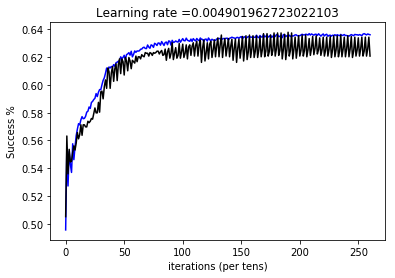

In [0]:
myNN = Deep_NN_frmwrk("catsDogs")
print(myNN.kfolds)
print(myNN.localfolder)

starttime = time.time()
print(time.ctime())

myNN.train_data()

### Test data
success = myNN.test_data((myNN.img_w, myNN.img_h))

endtime = time.time()
print('Time {0}, num_epochs {1}, success {2}'.format((endtime-starttime), myNN.epochs, success))

